In [1]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Setup environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 600)

#Read Dataset

The datasets we used are up to date 20 September 2021

In [3]:
#cases_mysia_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'
cases_mysia_url = '/content/drive/Shareddrives/Data Mining (1)/1181101614_Soe Zhao Hong/Dataset/cases_malaysia.csv'
df_cases_mysia = pd.read_csv(cases_mysia_url)
df_cases_mysia.head()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#test_mysia_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv'
test_mysia_url = '/content/drive/Shareddrives/Data Mining (1)/1181101614_Soe Zhao Hong/Dataset/tests_malaysia.csv'
df_test_mysia = pd.read_csv(test_mysia_url)
df_test_mysia.head()

,date,rtk-ag,pcr
0,2020-01-24,0,2
1,2020-01-25,0,5
2,2020-01-26,0,14
3,2020-01-27,0,24
4,2020-01-28,0,53


In [5]:
#clusters_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/clusters.csv'
clusters_url = '/content/drive/Shareddrives/Data Mining (1)/1181101614_Soe Zhao Hong/Dataset/clusters.csv'
df_clusters = pd.read_csv(clusters_url)
df_clusters.head()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
0,Kluster Warga Jepun,WP Kuala Lumpur,Lembah Pantai,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3
1,Kluster UDA,"WP Kuala Lumpur, WP Putrajaya, Selangor, Neger...",Pelbagai,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142
2,Kluster Keagamaan (Tabligh SP),Semua Negeri,Pelbagai,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988
3,Kluster Tabligh New Delhi,"Selangor, Negeri Sembilan, WP Kuala Lumpur & W...",Pelbagai,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24
4,Kluster AIROD,Pahang,Kuantan,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65


In [6]:
#cases_state_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'
cases_state_url = '/content/drive/Shareddrives/Data Mining (1)/1181101614_Soe Zhao Hong/Dataset/cases_state.csv'
df_cases_state = pd.read_csv(cases_state_url)
df_cases_state.head()

,date,state,cases_import,cases_new,cases_recovered
0,2020-01-25,Johor,4,4,0
1,2020-01-25,Kedah,0,0,0
2,2020-01-25,Kelantan,0,0,0
3,2020-01-25,Melaka,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0


In [7]:
#test_state_url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_state.csv'
test_state_url = '/content/drive/Shareddrives/Data Mining (1)/1181101614_Soe Zhao Hong/Dataset/tests_state.csv'
df_test_state = pd.read_csv(test_state_url)
df_test_state.head()

,date,state,rtk-ag,pcr
0,2021-07-01,Johor,2749,3670
1,2021-07-01,Kedah,2073,1297
2,2021-07-01,Kelantan,1348,1966
3,2021-07-01,Melaka,1049,2132
4,2021-07-01,Negeri Sembilan,2151,3306


#Merging Cases Malaysia and Test Malaysia

In [8]:
#Merge cases malaysia data with test malaysia data
df_mysia_merge = df_cases_mysia.merge(df_test_mysia,left_on=['date'],right_on=['date'],how='left')
df_mysia_merge.head()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,rtk-ag,pcr
0,2020-01-25,4,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0
1,2020-01-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0
2,2020-01-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0
3,2020-01-28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,53.0
4,2020-01-29,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71.0


In [9]:
#Print the shape of merged dataset
print("Size :", df_mysia_merge.shape)

Size : (605, 13)


In [10]:
#Check whether the merge dataset contains null value
df_mysia_merge.isnull().sum()

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
rtk-ag                       3
pcr                          3
dtype: int64

In [11]:
#Fill in the null value with 0
df_mysia_merge.fillna(0,inplace=True)

#View dataset again
df_mysia_merge.head()

,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,rtk-ag,pcr
0,2020-01-25,4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2,2020-01-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
3,2020-01-28,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,2020-01-29,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0


#Create Pivot Table

In [12]:
data_pivot = df_cases_state.pivot_table(values=['cases_new','cases_import'],index='date',columns=['state'])
data_pivot

cases_import                                                     \
state             Johor Kedah Kelantan Melaka Negeri Sembilan Pahang Perak   
date                                                                         
2020-01-25            4     0        0      0               0      0     0   
2020-01-26            0     0        0      0               0      0     0   
2020-01-27            0     0        0      0               0      0     0   
2020-01-28            0     0        0      0               0      0     0   
2020-01-29            2     1        0      0               0      0     0   
...                 ...   ...      ...    ...             ...    ...   ...   
2021-09-16            0     0        0      0               1      0     0   
2021-09-17            0     0        0      0               1      0     0   
2021-09-18            0     0        0      0               0      0     0   
2021-09-19            0     0        2      0               0      0     0   
2021-09-20           24     2        1      1               1      0     3   

                                                                  \
state      Perlis Pulau Pinang Sabah Sarawak Selangor Terengganu   
date                                                               
2020-01-25      0            0     0       0        0          0   
2020-01-26      0            0     0       0        0          0   
2020-01-27      0            0     0       0        0          0   
2020-01-28      0            0     0       0        0          0   
2020-01-29      0            0     0       0        0          0   
...           ...          ...   ...     ...      ...        ...   
2021-09-16      0            0     1       1        1          0   
2021-09-17      0            0     0       0        0          0   
2021-09-18      0            0     0       0        2          0   
2021-09-19      0            1     0       5        0          0   
2021-09-20      0            1     0       0        5          0   

                                                        cases_new        \
state      W.P. Kuala Lumpur W.P. Labuan W.P. Putrajaya     Johor Kedah   
date                                                                      
2020-01-25                 0           0              0         4     0   
2020-01-26                 0           0              0         0     0   
2020-01-27                 0           0              0         0     0   
2020-01-28                 0           0              0         0     0   
2020-01-29                 0           0              0         2     1   
...                      ...         ...            ...       ...   ...   
2021-09-16                 3           0              0      2206  1233   
2021-09-17                 2           0              0      2334  1173   
2021-09-18                 3           0              0      2208  1073   
2021-09-19                 3           0              0      1948   809   
2021-09-20                 5           0              0      1598   967   

                                                                             \
state      Kelantan Melaka Negeri Sembilan Pahang Perak Perlis Pulau Pinang   
date                                                                          
2020-01-25        0      0               0      0     0      0            0   
2020-01-26        0      0               0      0     0      0            0   
2020-01-27        0      0               0      0     0      0            0   
2020-01-28        0      0               0      0     0      0            0   
2020-01-29        0      0               0      0     0      0            0   
...             ...    ...             ...    ...   ...    ...          ...   
2021-09-16     1222    269             170    712  1446     80         1777   
2021-09-17      869    287             198    832  1596     41         1462   
2021-09-18     1214    263             131   

#Merge mysia_cases with state_cases

In [13]:
df_mysia_state_merge = df_mysia_merge.merge(data_pivot,left_on=['date'],right_on=['date'],how='left')
df_mysia_state_merge

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,rtk-ag,pcr,"(cases_import, Johor)","(cases_import, Kedah)","(cases_import, Kelantan)","(cases_import, Melaka)","(cases_import, Negeri Sembilan)","(cases_import, Pahang)","(cases_import, Perak)","(cases_import, Perlis)","(cases_import, Pulau Pinang)","(cases_import, Sabah)","(cases_import, Sarawak)","(cases_import, Selangor)","(cases_import, Terengganu)","(cases_import, W.P. Kuala Lumpur)","(cases_import, W.P. Labuan)","(cases_import, W.P. Putrajaya)","(cases_new, Johor)","(cases_new, Kedah)","(cases_new, Kelantan)","(cases_new, Melaka)","(cases_new, Negeri Sembilan)","(cases_new, Pahang)","(cases_new, Perak)","(cases_new, Perlis)","(cases_new, Pulau Pinang)","(cases_new, Sabah)","(cases_new, Sarawak)","(cases_new, Selangor)","(cases_new, Terengganu)","(cases_new, W.P. Kuala Lumpur)","(cases_new, W.P. Labuan)","(cases_new, W.P. Putrajaya)"
0,2020-01-25,4,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-26,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2021-09-16,18815,7,16939,0.0,4.0,456.0,47.0,45.0,54.0,775.0,47522.0,48838.0,0,0,0,0,1,0,0,0,0,1,1,1,0,3,0,0,2206,1233,1222,269,170,712,1446,80,1777,1982,3660,2718,814,493,11,22
601,2021-09-17,17577,3,22970,0.0,3.0,432.0,31.0,13.0,20.0,1055.0,66469.0,40675.0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,2334,1173,869,287,198,832,1596,41,1462,1533,3480,2646,719,366,10,31
602,2021-09-18,15549,5,17205,0.0,1.0,331.0,48.0,23.0,22.0,693.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,2,0,3,0,0,2208,1073,1214,263,131,634,1120,33,1375,1395,2929,1995,755,382,11,31
603,2021-09-19,14954,11,23469,0.0,8.0,196.0,39.0,3.0,72.0,720.0,0.0,0.0,0,0,2,0,0,0,0,0,1,0,5,0,0,3,0,0,1948,809,1420,207,144,705,1222,76,1259,1356,2707,2028,671,383,0,19


In [14]:
#Change date object to datetime
df_cases_state['date'] = pd.to_datetime(df_cases_state['date'],errors='coerce')
df_cases_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             9680 non-null   datetime64[ns]
 1   state            9680 non-null   object        
 2   cases_import     9680 non-null   int64         
 3   cases_new        9680 non-null   int64         
 4   cases_recovered  9680 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 378.2+ KB


In [15]:
#Convert date to datetime
df_mysia_state_merge['date'] = pd.to_datetime(df_mysia_state_merge['date'],errors='coerce')

#Calculate cases of each state accumulate so far

In [16]:
from datetime import timedelta
from dateutil.relativedelta import *

#Define function to calculate the cases of each state accumulate so far
def stateAccumulateCases(df,stateName):
  #Read the dataframe given and its repective state name
  df_read = df['state'] == stateName
  df_read_cases = df[df_read]
  df_read_cases = df_read_cases.reset_index()
  df_read_cases.drop(['cases_import','cases_recovered','index'], axis=1,inplace=True)

  #Define new columns to add into given dataframe
  #Since the Incubation period of Covid19 is around 14-21 days, thus we calculate the data range from 1 day before to 1 month before
  df_read_cases['1_day_before'] = 0
  df_read_cases['2_day_before'] = 0
  df_read_cases['3_day_before'] = 0
  df_read_cases['4_day_before'] = 0
  df_read_cases['5_day_before'] = 0
  df_read_cases['6_day_before'] = 0
  df_read_cases['1_week_before'] = 0
  df_read_cases['2_week_before'] = 0
  df_read_cases['3_week_before'] = 0
  df_read_cases['1_month_before'] = 0

  for i in range(3,9):
    for j in range(len(df_read_cases)):
      date = df_read_cases['date'][j] - relativedelta(days=+(i-2))
      yesterday = df_read_cases[df_read_cases['date'] == date]
      if yesterday.empty:
        df_read_cases.iloc[[j],[i]] = 0
      else:
        df_read_cases.iloc[[j],[i]] = yesterday.cases_new.values[0]

  for i in range(9,13):
    for j in range(len(df_read_cases)):
      date = df_read_cases['date'][j] - relativedelta(weeks=+(i-8))
      yesterday = df_read_cases[df_read_cases['date'] == date]
      if yesterday.empty:
        df_read_cases.iloc[[j],[i]] = 0
      else:
        df_read_cases.iloc[[j],[i]] = yesterday.cases_new.values[0]
  
  return df_read_cases

In [17]:
#Apply the function on all states and Wilayah Persekutuan
Johor = stateAccumulateCases(df_cases_state,'Johor')
Melaka = stateAccumulateCases(df_cases_state,'Melaka')
NegeriSembilan = stateAccumulateCases(df_cases_state,'Negeri Sembilan')
Selangor = stateAccumulateCases(df_cases_state,'Selangor')
Pahang = stateAccumulateCases(df_cases_state,'Pahang')
Perak = stateAccumulateCases(df_cases_state,'Perak')
Kelantan = stateAccumulateCases(df_cases_state,'Kelantan')
Kedah = stateAccumulateCases(df_cases_state,'Kedah')
Terengganu = stateAccumulateCases(df_cases_state,'Terengganu')
Perlis = stateAccumulateCases(df_cases_state,'Perlis')
Sarawak = stateAccumulateCases(df_cases_state,'Sarawak')
Sabah = stateAccumulateCases(df_cases_state,'Sabah')
KL = stateAccumulateCases(df_cases_state,'W.P. Kuala Lumpur')
Putrajaya = stateAccumulateCases(df_cases_state,'W.P. Putrajaya')
Labuan = stateAccumulateCases(df_cases_state,'W.P. Labuan')

In [18]:
All_State = [Johor, Melaka, NegeriSembilan, Selangor, Pahang, Perak, Kelantan, Kedah, Terengganu, Perlis, Sarawak, Sabah, KL, Putrajaya, Labuan]
df_allState_accumulate = pd.concat(All_State)
df_allState_accumulate

,date,state,cases_new,1_day_before,2_day_before,3_day_before,4_day_before,5_day_before,6_day_before,1_week_before,2_week_before,3_week_before,1_month_before
0,2020-01-25,Johor,4,0,0,0,0,0,0,0,0,0,0
1,2020-01-26,Johor,0,4,0,0,0,0,0,0,0,0,0
2,2020-01-27,Johor,0,0,4,0,0,0,0,0,0,0,0
3,2020-01-28,Johor,0,0,0,4,0,0,0,0,0,0,0
4,2020-01-29,Johor,2,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2021-09-16,W.P. Labuan,11,0,3,11,3,2,6,15,5,3,9
601,2021-09-17,W.P. Labuan,10,11,0,3,11,3,2,6,4,8,1
602,2021-09-18,W.P. Labuan,11,10,11,0,3,11,3,2,9,5,9
603,2021-09-19,W.P. Labuan,0,11,10,11,0,3,11,3,4,2,4


#Create Pivot Table for allStateAccumulate

In [19]:
allStateAcc_pivot = df_allState_accumulate.pivot_table(values=['1_day_before',	'2_day_before',	'3_day_before',	'4_day_before',	'5_day_before',	'6_day_before',	'1_week_before', '2_week_before',	'3_week_before', '1_month_before'],index='date',columns=['state'])
allStateAcc_pivot

1_day_before                                                     \
state             Johor Kedah Kelantan Melaka Negeri Sembilan Pahang Perak   
date                                                                         
2020-01-25            0     0        0      0               0      0     0   
2020-01-26            4     0        0      0               0      0     0   
2020-01-27            0     0        0      0               0      0     0   
2020-01-28            0     0        0      0               0      0     0   
2020-01-29            0     0        0      0               0      0     0   
...                 ...   ...      ...    ...             ...    ...   ...   
2021-09-16         1860  1178     1434    190             222    766  1174   
2021-09-17         2206  1233     1222    269             170    712  1446   
2021-09-18         2334  1173      869    287             198    832  1596   
2021-09-19         2208  1073     1214    263             131    634  1120   
2021-09-20         1948   809     1420    207             144    705  1222   

                                                                       \
state      Perlis Sabah Sarawak Selangor Terengganu W.P. Kuala Lumpur   
date                                                                    
2020-01-25      0     0       0        0          0                 0   
2020-01-26      0     0       0        0          0                 0   
2020-01-27      0     0       0        0          0                 0   
2020-01-28      0     0       0        0          0                 0   
2020-01-29      0     0       0        0          0                 0   
...           ...   ...     ...      ...        ...               ...   
2021-09-16    108  2015    4709     2710        993               363   
2021-09-17     80  1982    3660     2718        814               493   
2021-09-18     41  1533    3480     2646        719               366   
2021-09-19     33  1395    2929     1995        755               382   
2021-09-20     76  1356    2707     2028        671               383   

                                      1_month_before                        \
state      W.P. Labuan W.P. Putrajaya          Johor Kedah Kelantan Melaka   
date                                                                         
2020-01-25           0              0              0     0        0      0   
2020-01-26           0              0              0     0        0      0   
2020-01-27           0              0              0     0        0      0   
2020-01-28           0              0              0     0        0      0   
2020-01-29           0              0              0     0        0      0   
...                ...            ...            ...   ...      ...    ...   
2021-09-16           0             16           1526  2137     1271    737   
2021-09-17          11             22           1323  1932     1281    610   
2021-09-18          10             31           1558  1880     1039    882   
2021-09-19          11             31           1391  1948     1196    558   
2021-09-20           0             19           1367  1602     1176    363   

                                                                       \
state      Negeri Sembilan Pahang Perak Perlis Sabah Sarawak Selangor   
date                                                                    
2020-01-25               0      0     0      0     0       0        0   
2020-01-26               0      0     0      0     0       0        0   
2020-01-27               0      0     0      0     0       0        0   
2020-01-28               0      0     0      0     0       0        0   
2020-01-29               0      0     0      0     0       0        0   
...                    ...    ...   ...    ...   ...     ...      ...   
2021-09-16             556    736  1229     42  2583    1206     7175   
2021-09-17             608    517  1248     64  2738    2548     6974   

In [20]:
#Print allStateAcc_pivot columns
allStateAcc_pivot.columns.unique()

MultiIndex([('1_day_before',             'Johor'),
            ('1_day_before',             'Kedah'),
            ('1_day_before',          'Kelantan'),
            ('1_day_before',            'Melaka'),
            ('1_day_before',   'Negeri Sembilan'),
            ('1_day_before',            'Pahang'),
            ('1_day_before',             'Perak'),
            ('1_day_before',            'Perlis'),
            ('1_day_before',             'Sabah'),
            ('1_day_before',           'Sarawak'),
            ...
            ('6_day_before',            'Pahang'),
            ('6_day_before',             'Perak'),
            ('6_day_before',            'Perlis'),
            ('6_day_before',             'Sabah'),
            ('6_day_before',           'Sarawak'),
            ('6_day_before',          'Selangor'),
            ('6_day_before',        'Terengganu'),
            ('6_day_before', 'W.P. Kuala Lumpur'),
            ('6_day_before',       'W.P. Labuan'),
            ('6

#Merge All Together(Mysia_State with AllStateAcc)

In [21]:
df_merge_together = df_mysia_state_merge.merge(allStateAcc_pivot, left_on=['date'],right_on=['date'],how='left')
df_merge_together

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,rtk-ag,pcr,"(cases_import, Johor)","(cases_import, Kedah)","(cases_import, Kelantan)","(cases_import, Melaka)","(cases_import, Negeri Sembilan)","(cases_import, Pahang)","(cases_import, Perak)","(cases_import, Perlis)","(cases_import, Pulau Pinang)","(cases_import, Sabah)","(cases_import, Sarawak)","(cases_import, Selangor)","(cases_import, Terengganu)","(cases_import, W.P. Kuala Lumpur)","(cases_import, W.P. Labuan)","(cases_import, W.P. Putrajaya)","(cases_new, Johor)","(cases_new, Kedah)","(cases_new, Kelantan)","(cases_new, Melaka)","(cases_new, Negeri Sembilan)","(cases_new, Pahang)","(cases_new, Perak)","(cases_new, Perlis)","(cases_new, Pulau Pinang)","(cases_new, Sabah)","(cases_new, Sarawak)","(cases_new, Selangor)","(cases_new, Terengganu)","(cases_new, W.P. Kuala Lumpur)","(cases_new, W.P. Labuan)","(cases_new, W.P. Putrajaya)","(1_day_before, Johor)","(1_day_before, Kedah)","(1_day_before, Kelantan)","(1_day_before, Melaka)","(1_day_before, Negeri Sembilan)","(1_day_before, Pahang)","(1_day_before, Perak)","(1_day_before, Perlis)","(1_day_before, Sabah)","(1_day_before, Sarawak)","(1_day_before, Selangor)","(1_day_before, Terengganu)","(1_day_before, W.P. Kuala Lumpur)","(1_day_before, W.P. Labuan)","(1_day_before, W.P. Putrajaya)","(1_month_before, Johor)","(1_month_before, Kedah)","(1_month_before, Kelantan)","(1_month_before, Melaka)","(1_month_before, Negeri Sembilan)","(1_month_before, Pahang)","(1_month_before, Perak)","(1_month_before, Perlis)","(1_month_before, Sabah)","(1_month_before, Sarawak)","(1_month_before, Selangor)","(1_month_before, Terengganu)","(1_month_before, W.P. Kuala Lumpur)","(1_month_before, W.P. Labuan)","(1_month_before, W.P. Putrajaya)","(1_week_before, Johor)","(1_week_before, Kedah)","(1_week_before, Kelantan)","(1_week_before, Melaka)","(1_week_before, Negeri Sembilan)","(1_week_before, Pahang)","(1_week_before, Perak)","(1_week_before, Perlis)","(1_week_before, Sabah)","(1_week_before, Sarawak)","(1_week_before, Selangor)","(1_week_before, Terengganu)","(1_week_before, W.P. Kuala Lumpur)","(1_week_before, W.P. Labuan)","(1_week_before, W.P. Putrajaya)","(2_day_before, Johor)","(2_day_before, Kedah)","(2_day_before, Kelantan)","(2_day_before, Melaka)","(2_day_before, Negeri Sembilan)","(2_day_before, Pahang)","(2_day_before, Perak)","(2_day_before, Perlis)","(2_day_before, Sabah)","(2_day_before, Sarawak)","(2_day_before, Selangor)","(2_day_before, Terengganu)","(2_day_before, W.P. Kuala Lumpur)","(2_day_before, W.P. Labuan)","(2_day_before, W.P. Putrajaya)","(2_week_before, Johor)","(2_week_before, Kedah)","(2_week_before, Kelantan)","(2_week_before, Melaka)","(2_week_before, Negeri Sembilan)","(2_week_before, Pahang)","(2_week_before, Perak)","(2_week_before, Perlis)","(2_week_before, Sabah)","(2_week_before, Sarawak)","(2_week_before, Selangor)","(2_week_before, Terengganu)","(2_week_before, W.P. Kuala Lumpur)","(2_week_before, W.P. Labuan)","(2_week_before, W.P. Putrajaya)","(3_day_before, Johor)","(3_day_before, Kedah)","(3_day_before, Kelantan)","(3_day_before, Melaka)","(3_day_before, Negeri Sembilan)","(3_day_before, Pahang)","(3_day_before, Perak)","(3_day_before, Perlis)","(3_day_before, Sabah)","(3_day_before, Sarawak)","(3_day_before, Selangor)","(3_day_before, Terengganu)","(3_day_before, W.P. Kuala Lumpur)","(3_day_before, W.P. Labuan)","(3_day_before, W.P. Putrajaya)","(3_week_before, Johor)","(3_week_before, Kedah)","(3_week_before, Kelantan)","(3_week_before, Melaka)","(3_week_before, Negeri Sembilan)","(3_week_before, Pahang)","(3_week_before, Perak)","(3_week_before, Perlis)","(3_week_before, Sabah)","(3_week_before, Sarawak)","(3_week_before, Selangor)","(3_week_before, Terengganu)","(3_week_before, W.P. Kuala Lumpur)","(3_week_before, W.P. Labuan)","(3_week_before, W.P. Putrajaya)","(4_day_be

In [22]:
#Check info
df_merge_together.columns.unique()

Index([                               'date',
                                 'cases_new',
                              'cases_import',
                           'cases_recovered',
                            'cluster_import',
                         'cluster_religious',
                         'cluster_community',
                          'cluster_highRisk',
                         'cluster_education',
                   'cluster_detentionCentre',
       ...
                  ('6_day_before', 'Pahang'),
                   ('6_day_before', 'Perak'),
                  ('6_day_before', 'Perlis'),
                   ('6_day_before', 'Sabah'),
                 ('6_day_before', 'Sarawak'),
                ('6_day_before', 'Selangor'),
              ('6_day_before', 'Terengganu'),
       ('6_day_before', 'W.P. Kuala Lumpur'),
             ('6_day_before', 'W.P. Labuan'),
          ('6_day_before', 'W.P. Putrajaya')],
      dtype='object', length=195)

#**Question 3**

#**Feature Selection With Boruta**

In [23]:
!pip install Boruta

     |████████████████████████████████| 56 kB 2.4 MB/s 


In [24]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from tqdm import tqdm_notebook, tqdm

import warnings
warnings.filterwarnings('ignore')

In [25]:
#Define ranking function to calculate the feature importance score. The code is taken from lab tutorial.
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [26]:
#One hot encoding

df_merge_together = df_merge_together.drop('date',1)
df_merge_together_encode = pd.get_dummies(df_merge_together)
df_merge_together_encode.to_csv('/content/drive/Shareddrives/Data Mining (1)/1181101614_Soe Zhao Hong/Dataset/df_merge_together.csv')
df_merge_together_encode

,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,rtk-ag,pcr,"(cases_import, Johor)","(cases_import, Kedah)","(cases_import, Kelantan)","(cases_import, Melaka)","(cases_import, Negeri Sembilan)","(cases_import, Pahang)","(cases_import, Perak)","(cases_import, Perlis)","(cases_import, Pulau Pinang)","(cases_import, Sabah)","(cases_import, Sarawak)","(cases_import, Selangor)","(cases_import, Terengganu)","(cases_import, W.P. Kuala Lumpur)","(cases_import, W.P. Labuan)","(cases_import, W.P. Putrajaya)","(cases_new, Johor)","(cases_new, Kedah)","(cases_new, Kelantan)","(cases_new, Melaka)","(cases_new, Negeri Sembilan)","(cases_new, Pahang)","(cases_new, Perak)","(cases_new, Perlis)","(cases_new, Pulau Pinang)","(cases_new, Sabah)","(cases_new, Sarawak)","(cases_new, Selangor)","(cases_new, Terengganu)","(cases_new, W.P. Kuala Lumpur)","(cases_new, W.P. Labuan)","(cases_new, W.P. Putrajaya)","(1_day_before, Johor)","(1_day_before, Kedah)","(1_day_before, Kelantan)","(1_day_before, Melaka)","(1_day_before, Negeri Sembilan)","(1_day_before, Pahang)","(1_day_before, Perak)","(1_day_before, Perlis)","(1_day_before, Sabah)","(1_day_before, Sarawak)","(1_day_before, Selangor)","(1_day_before, Terengganu)","(1_day_before, W.P. Kuala Lumpur)","(1_day_before, W.P. Labuan)","(1_day_before, W.P. Putrajaya)","(1_month_before, Johor)","(1_month_before, Kedah)","(1_month_before, Kelantan)","(1_month_before, Melaka)","(1_month_before, Negeri Sembilan)","(1_month_before, Pahang)","(1_month_before, Perak)","(1_month_before, Perlis)","(1_month_before, Sabah)","(1_month_before, Sarawak)","(1_month_before, Selangor)","(1_month_before, Terengganu)","(1_month_before, W.P. Kuala Lumpur)","(1_month_before, W.P. Labuan)","(1_month_before, W.P. Putrajaya)","(1_week_before, Johor)","(1_week_before, Kedah)","(1_week_before, Kelantan)","(1_week_before, Melaka)","(1_week_before, Negeri Sembilan)","(1_week_before, Pahang)","(1_week_before, Perak)","(1_week_before, Perlis)","(1_week_before, Sabah)","(1_week_before, Sarawak)","(1_week_before, Selangor)","(1_week_before, Terengganu)","(1_week_before, W.P. Kuala Lumpur)","(1_week_before, W.P. Labuan)","(1_week_before, W.P. Putrajaya)","(2_day_before, Johor)","(2_day_before, Kedah)","(2_day_before, Kelantan)","(2_day_before, Melaka)","(2_day_before, Negeri Sembilan)","(2_day_before, Pahang)","(2_day_before, Perak)","(2_day_before, Perlis)","(2_day_before, Sabah)","(2_day_before, Sarawak)","(2_day_before, Selangor)","(2_day_before, Terengganu)","(2_day_before, W.P. Kuala Lumpur)","(2_day_before, W.P. Labuan)","(2_day_before, W.P. Putrajaya)","(2_week_before, Johor)","(2_week_before, Kedah)","(2_week_before, Kelantan)","(2_week_before, Melaka)","(2_week_before, Negeri Sembilan)","(2_week_before, Pahang)","(2_week_before, Perak)","(2_week_before, Perlis)","(2_week_before, Sabah)","(2_week_before, Sarawak)","(2_week_before, Selangor)","(2_week_before, Terengganu)","(2_week_before, W.P. Kuala Lumpur)","(2_week_before, W.P. Labuan)","(2_week_before, W.P. Putrajaya)","(3_day_before, Johor)","(3_day_before, Kedah)","(3_day_before, Kelantan)","(3_day_before, Melaka)","(3_day_before, Negeri Sembilan)","(3_day_before, Pahang)","(3_day_before, Perak)","(3_day_before, Perlis)","(3_day_before, Sabah)","(3_day_before, Sarawak)","(3_day_before, Selangor)","(3_day_before, Terengganu)","(3_day_before, W.P. Kuala Lumpur)","(3_day_before, W.P. Labuan)","(3_day_before, W.P. Putrajaya)","(3_week_before, Johor)","(3_week_before, Kedah)","(3_week_before, Kelantan)","(3_week_before, Melaka)","(3_week_before, Negeri Sembilan)","(3_week_before, Pahang)","(3_week_before, Perak)","(3_week_before, Perlis)","(3_week_before, Sabah)","(3_week_before, Sarawak)","(3_week_before, Selangor)","(3_week_before, Terengganu)","(3_week_before, W.P. Kuala Lumpur)","(3_week_before, W.P. Labuan)","(3_week_before, W.P. Putrajaya)","(4_day_before,

# Boruta - Pahang

In [27]:
#Get x and y for pahang
y_pahang = df_merge_together_encode[('cases_new', 'Pahang')]
X_pahang = df_merge_together_encode.drop(('cases_new', 'Pahang'),1)
colnames = X_pahang.columns

In [28]:
#Fit x and y into boruta
rf = RandomForestClassifier(n_jobs=1,class_weight="balanced",max_depth=5)
feat_selector_pahang = BorutaPy(rf,n_estimators="auto",random_state=1)
feat_selector_pahang.fit(X_pahang.values,y_pahang.values.ravel())

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=97, n_jobs=1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FB4FD6218D0,
                                          verbose=0, warm_start=Fa

In [29]:
#Get the score
boruta_score_pahang = ranking(list(map(float,feat_selector_pahang.ranking_)),colnames,order=-1)
boruta_score_pahang = pd.DataFrame(list(boruta_score_pahang.items()),columns=['Features','Score'])
boruta_score_pahang = boruta_score_pahang.sort_values("Score",ascending=False)

In [30]:
#Display Top 15 and Bottom 15 boruta score of Pahang
print('---------Top 15----------')
display(boruta_score_pahang.head(15))

print('---------Bottom 15----------')
display(boruta_score_pahang.tail(15))

---------Top 15----------


,Features,Score
11,pcr,1.00
106,"(2_week_before, Melaka)",0.99
54,"(1_day_before, Terengganu)",0.99
62,"(1_month_before, Negeri Sembilan)",0.99
149,"(4_day_before, Kedah)",0.99
47,"(1_day_before, Negeri Sembilan)",0.99
158,"(4_day_before, Selangor)",0.99
71,"(1_month_before, W.P. Labuan)",0.99
90,"(2_day_before, Kelantan)",0.99
160,"(4_day_before, W.P. Kuala Lumpur)",0.99


---------Bottom 15----------


,Features,Score
103,"(2_week_before, Johor)",0.08
43,"(1_day_before, Johor)",0.07
127,"(3_day_before, Sarawak)",0.07
141,"(3_week_before, Sabah)",0.06
192,"(6_day_before, W.P. Putrajaya)",0.06
16,"(cases_import, Negeri Sembilan)",0.05
18,"(cases_import, Perak)",0.04
24,"(cases_import, Terengganu)",0.04
22,"(cases_import, Sarawak)",0.03
13,"(cases_import, Kedah)",0.03


In [31]:
#Print out the ranking generated by Robuta Algorithm afer fitting the X and y
print("Ranking Generated: ",feat_selector_pahang.ranking_)
print("No. of significant features: ", feat_selector_pahang.n_features_) 

Ranking Generated:  [ 49 117  82  26   4  34  39 147 121  76  53   1  63 180 163 183 176  96
 178 185 137 181 179 139 177  73 181 184 115  36  18   7  11 156 143  93
 128 152  38  76 113   2 123 172  41 170  20   3  72 167 143 161 102  31
   2   7  54 110 112 165  99  15   2 110 159 166 168 108  93  24  82   2
 107  74  89  91  31  22  51 117 137 127 147  62 132  28  51  50  66  19
   2  17  44  13 125 133 113  48  15 136   9   5  27 171  89 128   2  25
  98 155 141 159 122  56  89  46  86 140  79  13  86  30  91 105  96 168
 117 173  23 101  20 157  40 150 145  84  63 164  76 135 143 174  29 134
 105  41  45 162  55   2 108  13 126  34 100 102  65 159   2  66   2  33
 105  69  69  47  80  61  81 131 150  71 153   5  85 119   9  36 120  58
 147  59  43 153  96 130 123 150  60  56  68  78 174]
No. of significant features:  1


In [32]:
#Get the top 30 ranking using boruta build in ranking's function
pahang_feat_imp_robuta = pd.DataFrame({'Feature':list(X_pahang.columns), 'Ranking':feat_selector_pahang.ranking_})
pahang_feat_imp_robuta.sort_values(by='Ranking')
pahang_top_rank_robuta = pahang_feat_imp_robuta['Ranking'] <= 30
pahang_feat_imp_robuta[pahang_top_rank_robuta].sort_values(["Ranking"],ascending=True).to_csv('/content/drive/Shareddrives/Data Mining (1)/Q3 Feature Selection/boruta_pahang.csv')
pahang_feat_imp_robuta[pahang_top_rank_robuta].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
11,pcr,1
90,"(2_day_before, Kelantan)",2
71,"(1_month_before, W.P. Labuan)",2
160,"(4_day_before, W.P. Kuala Lumpur)",2
62,"(1_month_before, Negeri Sembilan)",2
158,"(4_day_before, Selangor)",2
41,"(cases_new, W.P. Labuan)",2
149,"(4_day_before, Kedah)",2
106,"(2_week_before, Melaka)",2
54,"(1_day_before, Terengganu)",2


In [33]:
#Top 10 Features
robuta_pahang_sorted = pahang_feat_imp_robuta[pahang_top_rank_robuta].sort_values(["Ranking"],ascending=True)
robuta_pahang_sorted[robuta_pahang_sorted['Ranking'] <= 10]

,Feature,Ranking
11,pcr,1
90,"(2_day_before, Kelantan)",2
71,"(1_month_before, W.P. Labuan)",2
160,"(4_day_before, W.P. Kuala Lumpur)",2
62,"(1_month_before, Negeri Sembilan)",2
158,"(4_day_before, Selangor)",2
41,"(cases_new, W.P. Labuan)",2
149,"(4_day_before, Kedah)",2
106,"(2_week_before, Melaka)",2
54,"(1_day_before, Terengganu)",2


#Boruta - Kedah

In [58]:
#Get x and y for Kedah
y_kedah = df_merge_together_encode[('cases_new', 'Kedah')]
X_kedah = df_merge_together_encode.drop(('cases_new', 'Kedah'),1)
colnames = X_kedah.columns

In [59]:
#Fit x and y into boruta
rf = RandomForestClassifier(n_jobs=1,class_weight="balanced",max_depth=5)
feat_selector_kedah = BorutaPy(rf,n_estimators="auto",random_state=1)
feat_selector_kedah.fit(X_kedah.values,y_kedah.values.ravel())

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=89, n_jobs=1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FB4F90EE160,
                                          verbose=0, warm_start=Fa

In [60]:
#Get the score
boruta_score_kedah = ranking(list(map(float,feat_selector_kedah.ranking_)),colnames,order=-1)
boruta_score_kedah = pd.DataFrame(list(boruta_score_kedah.items()),columns=['Features','Score'])
boruta_score_kedah = boruta_score_kedah.sort_values("Score",ascending=False)

In [61]:
#Display Top 15 and Bottom 15 boruta score of Kedah
print('---------Top 15----------')
display(boruta_score_kedah.head(15))

print('---------Bottom 15----------')
display(boruta_score_kedah.tail(15))

---------Top 15----------


,Features,Score
11,pcr,1.00
75,"(1_week_before, Kelantan)",0.99
108,"(2_week_before, Pahang)",0.99
176,"(5_day_before, W.P. Labuan)",0.99
145,"(3_week_before, W.P. Kuala Lumpur)",0.98
91,"(2_day_before, Melaka)",0.97
128,"(3_day_before, Selangor)",0.97
130,"(3_day_before, W.P. Kuala Lumpur)",0.97
55,"(1_day_before, W.P. Kuala Lumpur)",0.97
175,"(5_day_before, W.P. Kuala Lumpur)",0.97


---------Bottom 15----------


,Features,Score
133,"(3_week_before, Johor)",0.07
17,"(cases_import, Pahang)",0.06
18,"(cases_import, Perak)",0.06
7,cluster_education,0.05
56,"(1_day_before, W.P. Labuan)",0.05
22,"(cases_import, Sarawak)",0.04
24,"(cases_import, Terengganu)",0.04
16,"(cases_import, Negeri Sembilan)",0.03
13,"(cases_import, Kedah)",0.03
14,"(cases_import, Kelantan)",0.02


In [62]:
#Print out the ranking generated by Robuta Algorithm afer fitting the X and y
print("Ranking Generated: ",feat_selector_kedah.ranking_)
print("No. of significant features: ", feat_selector_kedah.n_features_) 

Ranking Generated:  [ 63  75 130  68  34  81  16 181  29  41  28   1  85 186 187 188 185 179
 180 191 111 190 184  45 183  87 189 191 171 168  64  10  74 113 159 109
 162 104 115 109 142  20  40 132 122 147  20 126  55 124 172  59  27  20
 151   7 182  57 127 166 136  73  17 155 152 138 176 156  66  52  91 144
 130 139 147   2  68  43  79 159 107  43  98  47 177 104  85  52  31  85
  25   7  55  62 120 104  61  32  18 101  15  12  37 157  64 130  91  50
   2 149 169 161 137  88  36  41  76 106 133  48 123  30  45  68 139 163
 127 144   7 120   7 150 100 178 163 111  79 174  32  81 154 167 125  95
  89   4  23 135  93  49  77  55  39 116  77 174 118  71  23  91  22  13
  83  38  98  57  51  11 107 119 172  35  97  14  93   7   3 101 152 113
 141  68 165 133 170 116  59  71  95 158  26 147 142]
No. of significant features:  1


In [63]:
#Get the top 30 ranking using boruta build in ranking's function
kedah_feat_imp_robuta = pd.DataFrame({'Feature':list(X_kedah.columns), 'Ranking':feat_selector_kedah.ranking_})
kedah_feat_imp_robuta.sort_values(by='Ranking')
kedah_top_rank_robuta = kedah_feat_imp_robuta['Ranking'] <= 30
kedah_feat_imp_robuta[kedah_top_rank_robuta].sort_values(["Ranking"],ascending=True).to_csv('/content/drive/Shareddrives/Data Mining (1)/Q3 Feature Selection/boruta_kedah.csv')
kedah_feat_imp_robuta[kedah_top_rank_robuta].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
11,pcr,1
75,"(1_week_before, Kelantan)",2
108,"(2_week_before, Pahang)",2
176,"(5_day_before, W.P. Labuan)",3
145,"(3_week_before, W.P. Kuala Lumpur)",4
175,"(5_day_before, W.P. Kuala Lumpur)",7
130,"(3_day_before, W.P. Kuala Lumpur)",7
55,"(1_day_before, W.P. Kuala Lumpur)",7
128,"(3_day_before, Selangor)",7
91,"(2_day_before, Melaka)",7


In [64]:
#Top 10 Features
robuta_kedah_sorted = kedah_feat_imp_robuta[kedah_top_rank_robuta].sort_values(["Ranking"],ascending=True)
robuta_kedah_sorted[robuta_kedah_sorted['Ranking'] <= 10]

,Feature,Ranking
11,pcr,1
75,"(1_week_before, Kelantan)",2
108,"(2_week_before, Pahang)",2
176,"(5_day_before, W.P. Labuan)",3
145,"(3_week_before, W.P. Kuala Lumpur)",4
175,"(5_day_before, W.P. Kuala Lumpur)",7
130,"(3_day_before, W.P. Kuala Lumpur)",7
55,"(1_day_before, W.P. Kuala Lumpur)",7
128,"(3_day_before, Selangor)",7
91,"(2_day_before, Melaka)",7


#Boruta - Selangor

In [65]:
#Get x and y for Selangor
y_selangor = df_merge_together_encode[('cases_new', 'Selangor')]
X_selangor = df_merge_together_encode.drop(('cases_new', 'Selangor'),1)
colnames = X_kedah.columns

In [66]:
#Fit x and y into boruta
rf = RandomForestClassifier(n_jobs=1,class_weight="balanced",max_depth=5)
feat_selector_selangor = BorutaPy(rf,n_estimators="auto",random_state=1)
feat_selector_selangor.fit(X_selangor.values,y_selangor.values.ravel())

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=392, n_jobs=1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FB4F90EE7C0,
                                          verbose=0, warm_start=F

In [67]:
#Get the score
boruta_score_selangor = ranking(list(map(float,feat_selector_selangor.ranking_)),colnames,order=-1)
boruta_score_selangor = pd.DataFrame(list(boruta_score_selangor.items()),columns=['Features','Score'])
boruta_score_selangor = boruta_score_selangor.sort_values("Score",ascending=False)

In [68]:
#Display Top 15 and Bottom 15 boruta score of Selangor
print('---------Top 15----------')
display(boruta_score_selangor.head(15))

print('---------Bottom 15----------')
display(boruta_score_selangor.tail(15))

---------Top 15----------


,Features,Score
56,"(1_day_before, W.P. Labuan)",1.00
176,"(5_day_before, W.P. Labuan)",0.99
4,cluster_religious,0.99
158,"(4_day_before, Selangor)",0.98
25,"(cases_import, W.P. Kuala Lumpur)",0.98
71,"(1_month_before, W.P. Labuan)",0.97
98,"(2_day_before, Selangor)",0.97
8,cluster_detentionCentre,0.96
6,cluster_highRisk,0.96
107,"(2_week_before, Negeri Sembilan)",0.95


---------Bottom 15----------


,Features,Score
49,"(1_day_before, Perak)",0.08
183,"(6_day_before, Pahang)",0.07
117,"(2_week_before, W.P. Putrajaya)",0.06
102,"(2_day_before, W.P. Putrajaya)",0.06
64,"(1_month_before, Perak)",0.05
45,"(1_day_before, Kelantan)",0.05
24,"(cases_import, Terengganu)",0.04
13,"(cases_import, Kedah)",0.04
84,"(1_week_before, Terengganu)",0.03
18,"(cases_import, Perak)",0.03


In [69]:
#Print out the ranking generated by Robuta Algorithm afer fitting the X and y
print("Ranking Generated: ",feat_selector_selangor.ranking_)
print("No. of significant features: ", feat_selector_selangor.n_features_) 

Ranking Generated:  [ 57  65 176  45   3  77   9  18  10  12  70  36  63 186 165 192 191 137
 189 193 139 190 171  17 187   6  39 194 134  75  52  48  42 155 167 122
  61 103  85 173  47  59 100 125  73 184  35  48 133 179 163  29 110  32
 131  37   2  72  95 174 127 144  21 127 185 103 129 139 123 162  50   8
  89 169 158 165  95  61 117 152 141 114 175  64 188  80  24  55 149  23
 120  33  33 152 169  93  82  53   7  98  27  56 182 123 129 118 157  11
 147 142  91  68  95  66 119  45  39 183 110  83  74  29  19  75 147 135
  92 159  37 177  22  54  99 178 168 161 137  16 116 179  89 171  70 107
 126 101  58 163 105 120 107  87  26  86 144  83 105 142   5  67  14  15
  20  42 112  50 152  29 146 115 131  45  95  68 152  80   4  41 156  78
 159 136  12 181 152  61  88  79 101 109  29  25 113]
No. of significant features:  0


In [70]:
#Get the top 30 ranking using boruta build in ranking's function
selangor_feat_imp_robuta = pd.DataFrame({'Feature':list(X_selangor.columns), 'Ranking':feat_selector_selangor.ranking_})
selangor_feat_imp_robuta.sort_values(by='Ranking')
selangor_top_rank_robuta = selangor_feat_imp_robuta['Ranking'] <= 30
selangor_feat_imp_robuta[selangor_top_rank_robuta].sort_values(["Ranking"],ascending=True).to_csv('/content/drive/Shareddrives/Data Mining (1)/Q3 Feature Selection/boruta_selangor.csv')
selangor_feat_imp_robuta[selangor_top_rank_robuta].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
56,"(1_day_before, W.P. Labuan)",2
4,cluster_religious,3
176,"(5_day_before, W.P. Labuan)",4
158,"(4_day_before, Selangor)",5
25,"(cases_import, W.P. Kuala Lumpur)",6
98,"(2_day_before, Selangor)",7
71,"(1_month_before, W.P. Labuan)",8
6,cluster_highRisk,9
8,cluster_detentionCentre,10
107,"(2_week_before, Negeri Sembilan)",11


In [71]:
#Top 10 Features
robuta_selangor_sorted = selangor_feat_imp_robuta[selangor_top_rank_robuta].sort_values(["Ranking"],ascending=True)
robuta_selangor_sorted[robuta_selangor_sorted['Ranking'] <= 10]

,Feature,Ranking
56,"(1_day_before, W.P. Labuan)",2
4,cluster_religious,3
176,"(5_day_before, W.P. Labuan)",4
158,"(4_day_before, Selangor)",5
25,"(cases_import, W.P. Kuala Lumpur)",6
98,"(2_day_before, Selangor)",7
71,"(1_month_before, W.P. Labuan)",8
6,cluster_highRisk,9
8,cluster_detentionCentre,10


#Boruta - Johor

In [72]:
#Get x and y for johor
y_johor = df_merge_together_encode[('cases_new', 'Johor')]
X_johor = df_merge_together_encode.drop(('cases_new', 'Johor'),1)
colnames = X_johor.columns

In [73]:
#Fit x and y into boruta
rf = RandomForestClassifier(n_jobs=1,class_weight="balanced",max_depth=5)
feat_selector_johor = BorutaPy(rf,n_estimators="auto",random_state=1)
feat_selector_johor.fit(X_johor.values,y_johor.values.ravel())

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=48, n_jobs=1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FB4F90EED10,
                                          verbose=0, warm_start=Fa

In [74]:
#Get the score
boruta_score_johor = ranking(list(map(float,feat_selector_johor.ranking_)),colnames,order=-1)
boruta_score_johor = pd.DataFrame(list(boruta_score_johor.items()),columns=['Features','Score'])
boruta_score_johor = boruta_score_johor.sort_values("Score",ascending=False)

In [75]:
#Display Top 15 and Bottom 15 boruta score of Johor
print('---------Top 15----------')
display(boruta_score_johor.head(15))

print('---------Bottom 15----------')
display(boruta_score_johor.tail(15))

---------Top 15----------


,Features,Score
130,"(3_day_before, W.P. Kuala Lumpur)",1.00
146,"(3_week_before, W.P. Labuan)",0.99
101,"(2_day_before, W.P. Labuan)",0.99
8,cluster_detentionCentre,0.99
98,"(2_day_before, Selangor)",0.98
158,"(4_day_before, Selangor)",0.98
31,"(cases_new, Negeri Sembilan)",0.97
175,"(5_day_before, W.P. Kuala Lumpur)",0.97
92,"(2_day_before, Negeri Sembilan)",0.96
176,"(5_day_before, W.P. Labuan)",0.96


---------Bottom 15----------


,Features,Score
125,"(3_day_before, Perlis)",0.07
187,"(6_day_before, Sarawak)",0.07
84,"(1_week_before, Terengganu)",0.06
16,"(cases_import, Negeri Sembilan)",0.06
24,"(cases_import, Terengganu)",0.05
134,"(3_week_before, Kedah)",0.05
26,"(cases_import, W.P. Labuan)",0.04
180,"(6_day_before, Kelantan)",0.04
19,"(cases_import, Perlis)",0.03
49,"(1_day_before, Perak)",0.03


In [76]:
#Print out the ranking generated by Robuta Algorithm afer fitting the X and y
print("Ranking Generated: ",feat_selector_johor.ranking_)
print("No. of significant features: ", feat_selector_johor.n_features_) 

Ranking Generated:  [108  62 110  28  11  70 111 176   2  27  24  30 106 113 154 188 181  93
  68 187 189 191 190  23 182  68 184 192  52 145  45   6  66 133 106 135
 111  84  61 102  99  31  96 143  42 175  21  33 137 186 120 126 141  17
 121  24 133 151 148 174 165  72  53 162 177  83 172  31 140  79  73  34
 118 139 150 152  40  47 122 165 129  26  57  82 180  57 149 168  48 116
 108  96   9 131 143 101  36  50   5  79 114   3  71 170 135 160  86  15
 102 154  39 124 129  40  75  37  77 167 163  50  79  66  20  88 118 178
  96 157  19 164   1  76 125 158 183  93  99 153  45 156  90 161  56 116
 168  91   2 171  45  59 138  91  13  64  81  62  38 172   4  49  14  29
  53  18 106 142 114  16 147 126 128  10 131  12  66   6   8  88 122  73
 184  34  43  60 158  88  55 179  85  98 104  22 146]
No. of significant features:  1


In [77]:
#Get the top 30 ranking using boruta build in ranking's function
johor_feat_imp_robuta = pd.DataFrame({'Feature':list(X_johor.columns), 'Ranking':feat_selector_johor.ranking_})
johor_feat_imp_robuta.sort_values(by='Ranking')
johor_top_rank_robuta = johor_feat_imp_robuta['Ranking'] <= 30
johor_feat_imp_robuta[johor_top_rank_robuta].sort_values(["Ranking"],ascending=True).to_csv('/content/drive/Shareddrives/Data Mining (1)/Q3 Feature Selection/boruta_johor.csv')
johor_feat_imp_robuta[johor_top_rank_robuta].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
130,"(3_day_before, W.P. Kuala Lumpur)",1
8,cluster_detentionCentre,2
146,"(3_week_before, W.P. Labuan)",2
101,"(2_day_before, W.P. Labuan)",3
158,"(4_day_before, Selangor)",4
98,"(2_day_before, Selangor)",5
175,"(5_day_before, W.P. Kuala Lumpur)",6
31,"(cases_new, Negeri Sembilan)",6
176,"(5_day_before, W.P. Labuan)",8
92,"(2_day_before, Negeri Sembilan)",9


In [78]:
#Top 10 Features
robuta_johor_sorted = johor_feat_imp_robuta[johor_top_rank_robuta].sort_values(["Ranking"],ascending=True)
robuta_johor_sorted[robuta_johor_sorted['Ranking'] <= 10]

,Feature,Ranking
130,"(3_day_before, W.P. Kuala Lumpur)",1
8,cluster_detentionCentre,2
146,"(3_week_before, W.P. Labuan)",2
101,"(2_day_before, W.P. Labuan)",3
158,"(4_day_before, Selangor)",4
98,"(2_day_before, Selangor)",5
175,"(5_day_before, W.P. Kuala Lumpur)",6
31,"(cases_new, Negeri Sembilan)",6
176,"(5_day_before, W.P. Labuan)",8
92,"(2_day_before, Negeri Sembilan)",9


#**Feature Selection with Recursive Feature Elimination(RFE)**

#RFE - Pahang

In [ ]:
#Get x and y for pahang
rf_pahang = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf_pahang.fit(X_pahang,y_pahang)
rfe_pahang = RFECV(rf_pahang,min_features_to_select=1,cv=3)

In [ ]:
#Fit x and y into RFE
rfe_pahang.fit(X_pahang,y_pahang)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='gini', max_depth=5,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
#Get feature importance score
rfe_score_pahang = ranking(list(map(float, rfe_pahang.ranking_)), colnames, order=-1)
rfe_score_pahang = pd.DataFrame(list(rfe_score_pahang.items()), columns=['Features', 'Score'])
rfe_score_pahang = rfe_score_pahang.sort_values("Score", ascending = False)

In [ ]:
#Display Top 15 and Bottom 15 RFE score of Pahang
print('---------Top 15----------')
display(rfe_score_pahang.head(15))

print('---------Bottom 15----------')
display(rfe_score_pahang.tail(15))

---------Top 15----------


,Features,Score
96,"(2_day_before, Sabah)",1.0
174,"(5_day_before, Terengganu)",1.0
100,"(2_day_before, W.P. Kuala Lumpur)",1.0
101,"(2_day_before, W.P. Labuan)",1.0
102,"(2_day_before, W.P. Putrajaya)",1.0
106,"(2_week_before, Melaka)",1.0
107,"(2_week_before, Negeri Sembilan)",1.0
108,"(2_week_before, Pahang)",1.0
110,"(2_week_before, Perlis)",1.0
177,"(5_day_before, W.P. Putrajaya)",1.0


---------Bottom 15----------


,Features,Score
13,"(cases_import, Kedah)",0.21
112,"(2_week_before, Sarawak)",0.20
15,"(cases_import, Melaka)",0.18
61,"(1_month_before, Melaka)",0.17
192,"(6_day_before, W.P. Putrajaya)",0.15
32,"(cases_new, Pahang)",0.14
99,"(2_day_before, Terengganu)",0.12
123,"(3_day_before, Pahang)",0.11
19,"(cases_import, Perlis)",0.09
27,"(cases_import, W.P. Putrajaya)",0.08


In [ ]:
#Print out the ranking generated by RFE Algorithm afer fitting the X and y
print("Ranking Generated: ",rfe_pahang.ranking_)
print("No. of significant features: ", rfe_pahang.n_features_) 

Ranking Generated:  [46  1 28  1  1  1  1 36  1  1  1  1  1 53  4 55 34  1 35 61  1 50 23 22
 30  1 51 62 17  1  1 18 58  1  1 43  1  1  1  1  1  1  1 32  1  1  1 49
  1  1  1  1  1  1  1  1  1  1  1  1 13 56 14 67  9 27 44  1  1  1  1  1
  3 16  1  1  1  1  1  1  1  1 20  1 41  1  1  1  1  1  1  1  1 11 38 64
  1 48  1 59  1  1  1 39 19  8  1  1  1 42  1 63 54  1 52  1  1 21  1 12
  1  1  1 60  1  1 40  1  1  1  1  1  1 15 47 37  1 45  1 29  1  1  1  7
  1  1  1  1 65  1  1  1  1  1  1 24  1 33  1  1  1  1  1  1  1  1  1  1
 31 10  1 25  6  1  1  2  1  1  5  1  1  1  1  1  1  1  1 66  1 26  1  1
 57]
No. of significant features:  127


In [ ]:
#Get the top 30 ranking using RFE build in ranking's function
pahang_feat_imp_rfe = pd.DataFrame({'Feature':list(X_pahang.columns), 'Ranking':rfe_pahang.ranking_})
pahang_feat_imp_rfe.sort_values(by='Ranking')
pahang_top_rank_rfe = pahang_feat_imp_rfe['Ranking'] <= 30
pahang_feat_imp_rfe[pahang_top_rank_rfe].sort_values(["Ranking"],ascending=True).to_csv('/content/drive/Shareddrives/Data Mining (1)/Q3 Feature Selection/rfe_pahang.csv')
pahang_feat_imp_rfe[pahang_top_rank_rfe].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
1,cases_import,1
141,"(3_week_before, Sabah)",1
140,"(3_week_before, Perlis)",1
138,"(3_week_before, Pahang)",1
136,"(3_week_before, Melaka)",1
...,...,...
189,"(6_day_before, Terengganu)",26
65,"(1_month_before, Perlis)",27
2,cases_recovered,28
139,"(3_week_before, Perak)",29


In [ ]:
#Top 10 Features
rfe_pahang_sorted = pahang_feat_imp_rfe[pahang_top_rank_rfe].sort_values(["Ranking"],ascending=True)
rfe_pahang_sorted[rfe_pahang_sorted['Ranking'] <= 10]

,Feature,Ranking
1,cases_import,1
141,"(3_week_before, Sabah)",1
140,"(3_week_before, Perlis)",1
138,"(3_week_before, Pahang)",1
136,"(3_week_before, Melaka)",1
...,...,...
172,"(5_day_before, Sarawak)",6
143,"(3_week_before, Selangor)",7
105,"(2_week_before, Kelantan)",8
64,"(1_month_before, Perak)",9


#RFE - Kedah

In [ ]:
#Get x and y for kedah
rf_kedah = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf_kedah.fit(X_kedah,y_kedah)
rfe_kedah = RFECV(rf_kedah,min_features_to_select=1,cv=3)

In [ ]:
#Fit x and y into RFE
rfe_kedah.fit(X_kedah,y_kedah)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='gini', max_depth=5,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
#Get feature importance score
rfe_score_kedah = ranking(list(map(float, rfe_kedah.ranking_)), colnames, order=-1)
rfe_score_kedah = pd.DataFrame(list(rfe_score_kedah.items()), columns=['Features', 'Score'])
rfe_score_kedah = rfe_score_kedah.sort_values("Score", ascending = False)

In [ ]:
#Display Top 15 and Bottom 15 RFE score of Kedah
print('---------Top 15----------')
display(rfe_score_kedah.head(15))

print('---------Bottom 15----------')
display(rfe_score_kedah.tail(15))

---------Top 15----------


,Features,Score
0,cases_new,1.0
130,"(3_day_before, W.P. Kuala Lumpur)",1.0
121,"(3_day_before, Melaka)",1.0
122,"(3_day_before, Negeri Sembilan)",1.0
123,"(3_day_before, Pahang)",1.0
124,"(3_day_before, Perak)",1.0
125,"(3_day_before, Perlis)",1.0
126,"(3_day_before, Sabah)",1.0
127,"(3_day_before, Sarawak)",1.0
128,"(3_day_before, Selangor)",1.0


---------Bottom 15----------


,Features,Score
64,"(1_month_before, Perak)",1.00
67,"(1_month_before, Sarawak)",1.00
65,"(1_month_before, Perlis)",1.00
185,"(6_day_before, Perlis)",0.92
104,"(2_week_before, Kedah)",0.83
174,"(5_day_before, Terengganu)",0.75
16,"(cases_import, Negeri Sembilan)",0.67
90,"(2_day_before, Kelantan)",0.58
2,cases_recovered,0.50
17,"(cases_import, Pahang)",0.42


In [ ]:
#Print out the ranking generated by RFE Algorithm afer fitting the X and y
print("Ranking Generated: ",rfe_kedah.ranking_)
print("No. of significant features: ", rfe_kedah.n_features_) 

Ranking Generated:  [ 1  1  7  1  1  1  1  1  1  1  1  1  1  1  1  1  5  8  1 10  1  9  1  1
  1  1  1 11  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  1  1  1  1  1
  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 12  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 13  1
  1  1  1  1  1  1  4  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1
  1]
No. of significant features:  181


In [ ]:
#Get the top 30 ranking using RFE build in ranking's function
kedah_feat_imp_rfe = pd.DataFrame({'Feature':list(X_kedah.columns), 'Ranking':rfe_kedah.ranking_})
kedah_feat_imp_rfe.sort_values(by='Ranking')
kedah_top_rank_rfe = kedah_feat_imp_rfe['Ranking'] <= 30
kedah_feat_imp_rfe[kedah_top_rank_rfe].sort_values(["Ranking"],ascending=True).to_csv('/content/drive/Shareddrives/Data Mining (1)/Q3 Feature Selection/rfe_kedah.csv')
kedah_feat_imp_rfe[kedah_top_rank_rfe].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
0,cases_new,1
121,"(3_day_before, Melaka)",1
122,"(3_day_before, Negeri Sembilan)",1
123,"(3_day_before, Pahang)",1
124,"(3_day_before, Perak)",1
...,...,...
21,"(cases_import, Sabah)",9
19,"(cases_import, Perlis)",10
27,"(cases_import, W.P. Putrajaya)",11
133,"(3_week_before, Johor)",12


In [ ]:
#Top 10 Features
rfe_kedah_sorted = kedah_feat_imp_rfe[kedah_top_rank_rfe].sort_values(["Ranking"],ascending=True)
rfe_kedah_sorted[rfe_kedah_sorted['Ranking'] <= 10]

,Feature,Ranking
0,cases_new,1
121,"(3_day_before, Melaka)",1
122,"(3_day_before, Negeri Sembilan)",1
123,"(3_day_before, Pahang)",1
124,"(3_day_before, Perak)",1
...,...,...
90,"(2_day_before, Kelantan)",6
2,cases_recovered,7
17,"(cases_import, Pahang)",8
21,"(cases_import, Sabah)",9


#RFE - Selangor

In [ ]:
#Get x and y for Selangor
rf_selangor = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf_selangor.fit(X_selangor,y_selangor)
rfe_selangor = RFECV(rf_selangor,min_features_to_select=1,cv=3)

In [ ]:
#Fit x and y into RFE
rfe_selangor.fit(X_selangor,y_selangor)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='gini', max_depth=5,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
#Get feature importance score
rfe_score_selangor = ranking(list(map(float, rfe_selangor.ranking_)), colnames, order=-1)
rfe_score_selangor = pd.DataFrame(list(rfe_score_selangor.items()), columns=['Features', 'Score'])
rfe_score_selangor = rfe_score_selangor.sort_values("Score", ascending = False)

In [ ]:
#Display Top 15 and Bottom 15 RFE score of Selangor
print('---------Top 15----------')
display(rfe_score_selangor.head(15))

print('---------Bottom 15----------')
display(rfe_score_selangor.tail(15))

---------Top 15----------


,Features,Score
0,cases_new,1.0
116,"(2_week_before, W.P. Labuan)",1.0
137,"(3_week_before, Negeri Sembilan)",1.0
136,"(3_week_before, Melaka)",1.0
135,"(3_week_before, Kelantan)",1.0
133,"(3_week_before, Johor)",1.0
132,"(3_day_before, W.P. Putrajaya)",1.0
131,"(3_day_before, W.P. Labuan)",1.0
130,"(3_day_before, W.P. Kuala Lumpur)",1.0
129,"(3_day_before, Terengganu)",1.0


---------Bottom 15----------


,Features,Score
30,"(cases_new, Melaka)",0.15
100,"(2_day_before, W.P. Kuala Lumpur)",0.14
38,"(cases_new, Selangor)",0.13
27,"(cases_import, W.P. Putrajaya)",0.12
17,"(cases_import, Pahang)",0.11
118,"(3_day_before, Johor)",0.10
83,"(1_week_before, Selangor)",0.09
89,"(2_day_before, Kedah)",0.08
178,"(6_day_before, Johor)",0.06
13,"(cases_import, Kedah)",0.05


In [ ]:
#Print out the ranking generated by RFE Algorithm afer fitting the X and y
print("Ranking Generated: ",rfe_selangor.ranking_)
print("No. of significant features: ", rfe_selangor.n_features_) 

Ranking Generated:  [ 1  1 13 15  1  9  1  1  1  1 24  1  1 89 76 56 91 84 92 66 21 73  1  1
 90  1  1 83 75 51 80  1  1 78 34 59 58  1 82 62 32  1  1 18 57  1  1  1
 20 33 72  1  1  1 42  1  1  1  1 12  1  1  1  1 63 30  1 27  1 65 69  1
 37 61 14  1  3  1 38 64 39 22 55 86 70  1  1  1  1 87 53  1  1 77 74 67
  1  1  1 94 81  1 46 93 35 17 31  1 25 23 60  4  1 40 54  1  1 68 85 47
  1  1  1 50 52 45  1  1  1  1  1  1  1  1 49  1  1  1  1 48 41 16  1  1
  1  1  1  8  6  1 11  1  1 36  1 28 19  1  1  1  1  1  1  1  1 43  1  1
  1  2 79  1  1 44  1  1  1  1 88  1 71  1  1 29  1  5  1  7 10 26  1  1
  1]
No. of significant features:  100


In [ ]:
#Get the top 30 ranking using RFE build in ranking's function
selangor_feat_imp_rfe = pd.DataFrame({'Feature':list(X_selangor.columns), 'Ranking':rfe_selangor.ranking_})
selangor_feat_imp_rfe.sort_values(by='Ranking')
selangor_top_rank_rfe = selangor_feat_imp_rfe['Ranking'] <= 30
selangor_feat_imp_rfe[selangor_top_rank_rfe].sort_values(["Ranking"],ascending=True).to_csv('/content/drive/Shareddrives/Data Mining (1)/Q3 Feature Selection/rfe_selangor.csv')
selangor_feat_imp_rfe[selangor_top_rank_rfe].sort_values(["Ranking"],ascending=True) 

,Feature,Ranking
0,cases_new,1
144,"(3_week_before, Terengganu)",1
143,"(3_week_before, Selangor)",1
142,"(3_week_before, Sarawak)",1
138,"(3_week_before, Pahang)",1
...,...,...
189,"(6_day_before, Terengganu)",26
67,"(1_month_before, Sarawak)",27
155,"(4_day_before, Perlis)",28
183,"(6_day_before, Pahang)",29


In [ ]:
#Top 10 Features
rfe_selangor_sorted = selangor_feat_imp_rfe[selangor_top_rank_rfe].sort_values(["Ranking"],ascending=True)
rfe_selangor_sorted[rfe_selangor_sorted['Ranking'] <= 10]

,Feature,Ranking
0,cases_new,1
144,"(3_week_before, Terengganu)",1
143,"(3_week_before, Selangor)",1
142,"(3_week_before, Sarawak)",1
138,"(3_week_before, Pahang)",1
...,...,...
148,"(4_day_before, Johor)",6
187,"(6_day_before, Sarawak)",7
147,"(3_week_before, W.P. Putrajaya)",8
5,cluster_community,9


#RFE - Johor

In [ ]:
#Get x and y for Johor
rf_johor = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf_johor.fit(X_johor,y_johor)
rfe_johor = RFECV(rf_johor,min_features_to_select=1,cv=3)

In [ ]:
#Fit x and y into RFE
rfe_johor.fit(X_johor,y_johor)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='gini', max_depth=5,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
#Get feature importance score
rfe_score_johor = ranking(list(map(float, rfe_johor.ranking_)), colnames, order=-1)
rfe_score_johor = pd.DataFrame(list(rfe_score_johor.items()), columns=['Features', 'Score'])
rfe_score_johor = rfe_score_johor.sort_values("Score", ascending = False)

In [ ]:
#Display Top 15 and Bottom 15 RFE score of Johor
print('---------Top 15----------')
display(rfe_score_johor.head(15))

print('---------Bottom 15----------')
display(rfe_score_johor.tail(15))

---------Top 15----------


,Features,Score
174,"(5_day_before, Terengganu)",1.0
76,"(1_week_before, Melaka)",1.0
112,"(2_week_before, Sarawak)",1.0
107,"(2_week_before, Negeri Sembilan)",1.0
176,"(5_day_before, W.P. Labuan)",1.0
102,"(2_day_before, W.P. Putrajaya)",1.0
55,"(1_day_before, W.P. Kuala Lumpur)",1.0
92,"(2_day_before, Negeri Sembilan)",1.0
175,"(5_day_before, W.P. Kuala Lumpur)",1.0
43,"(1_day_before, Johor)",1.0


---------Bottom 15----------


,Features,Score
19,"(cases_import, Perlis)",0.09
133,"(3_week_before, Johor)",0.08
134,"(3_week_before, Kedah)",0.08
49,"(1_day_before, Perak)",0.07
22,"(cases_import, Sarawak)",0.06
142,"(3_week_before, Sarawak)",0.06
79,"(1_week_before, Perak)",0.05
192,"(6_day_before, W.P. Putrajaya)",0.05
125,"(3_day_before, Perlis)",0.04
109,"(2_week_before, Perak)",0.03


In [ ]:
#Print out the ranking generated by RFE Algorithm afer fitting the X and y
print("Ranking Generated: ",rfe_johor.ranking_)
print("No. of significant features: ", rfe_johor.n_features_) 

Ranking Generated:  [121   4  72 126   1   1  83  25   1  57   1  54  64  89 114 119  76 129
  46 141 151 138 146  43 139 100  52 154 153  73  33  17  86 128  80   1
   1   2 118  69 108   7 137   1  19  81 152  12 111 144  90  27  59  26
 101   1  14   9 107 133  95   1  29  45  96   1  63   1  87 109  92   1
 115 112 135 155   1   1   1 148 116   1  36  91 120   1   1 122  49   6
 123 127   1  70  61  66  18  94  85  28  82  21   1  24   8  20  47   1
 113 150  98  68   1  74  93 132   1  37 102   1  32  65   1   1 103 149
  56   1  22 134  53   5  71 142 143  84 131  75  41 104 117  30 145   1
  16  60   1   1 136  39 110  42  38  97  48  35  55  50  34 140   1  15
  58 105   1 106  13   1  40  51 124  10 130  79   1   1   1  11 125  23
  77   3   1  31  88  62  44  78   1  99  67   1 147]
No. of significant features:  39


In [ ]:
#Get the top 30 ranking using RFE build in ranking's function
johor_feat_imp_rfe = pd.DataFrame({'Feature':list(X_johor.columns), 'Ranking':rfe_johor.ranking_})
johor_feat_imp_rfe.sort_values(by='Ranking')
johor_top_rank_rfe = johor_feat_imp_rfe['Ranking'] <= 30
johor_feat_imp_rfe[johor_top_rank_rfe].sort_values(["Ranking"],ascending=True).to_csv('/content/drive/Shareddrives/Data Mining (1)/Q3 Feature Selection/rfe_johor.csv')
johor_feat_imp_rfe[johor_top_rank_rfe].sort_values(["Ranking"],ascending=True)

,Feature,Ranking
191,"(6_day_before, W.P. Labuan)",1
67,"(1_month_before, Sarawak)",1
71,"(1_month_before, W.P. Labuan)",1
76,"(1_week_before, Melaka)",1
77,"(1_week_before, Negeri Sembilan)",1
...,...,...
53,"(1_day_before, Selangor)",26
51,"(1_day_before, Sabah)",27
99,"(2_day_before, Terengganu)",28
62,"(1_month_before, Negeri Sembilan)",29


In [ ]:
#Top 10 Features
rfe_johor_sorted = johor_feat_imp_rfe[johor_top_rank_rfe].sort_values(["Ranking"],ascending=True)
rfe_johor_sorted[rfe_johor_sorted['Ranking'] <= 10]

,Feature,Ranking
191,"(6_day_before, W.P. Labuan)",1
67,"(1_month_before, Sarawak)",1
71,"(1_month_before, W.P. Labuan)",1
76,"(1_week_before, Melaka)",1
77,"(1_week_before, Negeri Sembilan)",1
78,"(1_week_before, Pahang)",1
81,"(1_week_before, Sabah)",1
85,"(1_week_before, W.P. Kuala Lumpur)",1
86,"(1_week_before, W.P. Labuan)",1
143,"(3_week_before, Selangor)",1


#**Feature Selection with LASSO**

#LASSO - Pahang

In [ ]:
#Fix x and y into LASSO
clf_pahang = linear_model.Lasso(alpha=0.1)
clf_pahang.fit(X_pahang,y_pahang)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#Get feature importance score
clf_score_pahang = ranking(list(map(float, clf_pahang.coef_)), colnames, order=-1)
clf_score_pahang = pd.DataFrame(list(clf_score_pahang.items()), columns=['Features', 'Score'])
clf_score_pahang = clf_score_pahang.sort_values("Score", ascending = False)

In [ ]:
#Display Top 15 and Bottom 15 LASSO score of Pahang
print('---------Top 15----------')
display(clf_score_pahang.head(15))

print('---------Bottom 15----------')
display(clf_score_pahang.tail(15))

---------Top 15----------


,Features,Score
18,"(cases_import, Perak)",1.00
26,"(cases_import, W.P. Labuan)",1.00
117,"(2_week_before, W.P. Putrajaya)",0.95
12,"(cases_import, Johor)",0.94
87,"(1_week_before, W.P. Putrajaya)",0.92
72,"(1_month_before, W.P. Putrajaya)",0.89
24,"(cases_import, Terengganu)",0.89
42,"(cases_new, W.P. Putrajaya)",0.87
102,"(2_day_before, W.P. Putrajaya)",0.86
162,"(4_day_before, W.P. Putrajaya)",0.86


---------Bottom 15----------


,Features,Score
129,"(3_day_before, Terengganu)",0.77
140,"(3_week_before, Perlis)",0.77
161,"(4_day_before, W.P. Labuan)",0.77
185,"(6_day_before, Perlis)",0.73
95,"(2_day_before, Perlis)",0.73
155,"(4_day_before, Perlis)",0.72
170,"(5_day_before, Perlis)",0.72
57,"(1_day_before, W.P. Putrajaya)",0.72
65,"(1_month_before, Perlis)",0.71
27,"(cases_import, W.P. Putrajaya)",0.69


#LASSO - Kedah


In [ ]:
#Fix x and y into LASSO
clf_kedah = linear_model.Lasso(alpha=0.1)
clf_kedah.fit(X_kedah,y_kedah)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#Get feature importance score
clf_score_kedah = ranking(list(map(float, clf_kedah.coef_)), colnames, order=-1)
clf_score_kedah = pd.DataFrame(list(clf_score_kedah.items()), columns=['Features', 'Score'])
clf_score_kedah = clf_score_kedah.sort_values("Score", ascending = False)

In [ ]:
#Display Top 15 and Bottom 15 LASSO score of Kedah
print('---------Top 15----------')
display(clf_score_kedah.head(15))

print('---------Bottom 15----------')
display(clf_score_kedah.tail(15))

---------Top 15----------


,Features,Score
24,"(cases_import, Terengganu)",1.00
12,"(cases_import, Johor)",0.88
14,"(cases_import, Kelantan)",0.83
65,"(1_month_before, Perlis)",0.82
110,"(2_week_before, Perlis)",0.81
87,"(1_week_before, W.P. Putrajaya)",0.79
155,"(4_day_before, Perlis)",0.77
50,"(1_day_before, Perlis)",0.77
57,"(1_day_before, W.P. Putrajaya)",0.76
41,"(cases_new, W.P. Labuan)",0.76


---------Bottom 15----------


,Features,Score
69,"(1_month_before, Terengganu)",0.69
27,"(cases_import, W.P. Putrajaya)",0.68
72,"(1_month_before, W.P. Putrajaya)",0.68
80,"(1_week_before, Perlis)",0.65
147,"(3_week_before, W.P. Putrajaya)",0.65
140,"(3_week_before, Perlis)",0.63
102,"(2_day_before, W.P. Putrajaya)",0.63
162,"(4_day_before, W.P. Putrajaya)",0.61
125,"(3_day_before, Perlis)",0.61
34,"(cases_new, Perlis)",0.60


#LASSO - Selangor

In [ ]:
#Fix x and y into LASSO
clf_selangor = linear_model.Lasso(alpha=0.1)
clf_selangor.fit(X_selangor,y_selangor)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#Get feature importance score
clf_score_selangor = ranking(list(map(float, clf_selangor.coef_)), colnames, order=-1)
clf_score_selangor = pd.DataFrame(list(clf_score_selangor.items()), columns=['Features', 'Score'])
clf_score_selangor = clf_score_selangor.sort_values("Score", ascending = False)

In [ ]:
#Display Top 15 and Bottom 15 LASSO score of Selangor
print('---------Top 15----------')
display(clf_score_selangor.head(15))

print('---------Bottom 15----------')
display(clf_score_selangor.tail(15))

---------Top 15----------


,Features,Score
14,"(cases_import, Kelantan)",1.00
65,"(1_month_before, Perlis)",0.96
1,cases_import,0.96
110,"(2_week_before, Perlis)",0.94
155,"(4_day_before, Perlis)",0.94
24,"(cases_import, Terengganu)",0.94
102,"(2_day_before, W.P. Putrajaya)",0.91
95,"(2_day_before, Perlis)",0.90
42,"(cases_new, W.P. Putrajaya)",0.90
87,"(1_week_before, W.P. Putrajaya)",0.88


---------Bottom 15----------


,Features,Score
170,"(5_day_before, Perlis)",0.78
140,"(3_week_before, Perlis)",0.77
25,"(cases_import, W.P. Kuala Lumpur)",0.74
23,"(cases_import, Selangor)",0.71
15,"(cases_import, Melaka)",0.69
16,"(cases_import, Negeri Sembilan)",0.69
177,"(5_day_before, W.P. Putrajaya)",0.67
22,"(cases_import, Sarawak)",0.65
27,"(cases_import, W.P. Putrajaya)",0.58
3,cluster_import,0.57


#LASSO - Johor

In [ ]:
#Fix x and y into LASSO
clf_johor = linear_model.Lasso(alpha=0.1)
clf_johor.fit(X_johor,y_johor)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#Get feature importance score
clf_score_johor = ranking(list(map(float, clf_johor.coef_)), colnames, order=-1)
clf_score_johor = pd.DataFrame(list(clf_score_johor.items()), columns=['Features', 'Score'])
clf_score_johor = clf_score_johor.sort_values("Score", ascending = False)

In [ ]:
#Display Top 15 and Bottom 15 LASSO score of Johor
print('---------Top 15----------')
display(clf_score_johor.head(15))

print('---------Bottom 15----------')
display(clf_score_johor.tail(15))

---------Top 15----------


,Features,Score
14,"(cases_import, Kelantan)",1.00
20,"(cases_import, Pulau Pinang)",0.79
57,"(1_day_before, W.P. Putrajaya)",0.61
24,"(cases_import, Terengganu)",0.61
87,"(1_week_before, W.P. Putrajaya)",0.55
12,"(cases_import, Johor)",0.53
110,"(2_week_before, Perlis)",0.52
117,"(2_week_before, W.P. Putrajaya)",0.51
95,"(2_day_before, Perlis)",0.51
147,"(3_week_before, W.P. Putrajaya)",0.50


---------Bottom 15----------


,Features,Score
185,"(6_day_before, Perlis)",0.45
132,"(3_day_before, W.P. Putrajaya)",0.45
155,"(4_day_before, Perlis)",0.45
25,"(cases_import, W.P. Kuala Lumpur)",0.44
42,"(cases_new, W.P. Putrajaya)",0.44
80,"(1_week_before, Perlis)",0.44
170,"(5_day_before, Perlis)",0.43
34,"(cases_new, Perlis)",0.42
162,"(4_day_before, W.P. Putrajaya)",0.42
177,"(5_day_before, W.P. Putrajaya)",0.40


#**Question 4**

#Select Important Feature for training

In [34]:
##For Regression Model
#Since the RFE model seems to be overfit as it has too many ranking one in each state respectively and same goes to LASSO model, 
#Thus, we decide to use the feature importance generated by Robuta algorithm only, and set the ranking to 1-30

#Pahang
pahang_boruta = pahang_feat_imp_robuta[pahang_top_rank_robuta].reset_index().drop(['index','Ranking'],axis='columns')
X_pahang_feature_importance = X_pahang[pahang_boruta['Feature']]

In [35]:
pahang_boruta

,Feature
0,cluster_import
1,cluster_religious
2,pcr
3,"(cases_new, Kelantan)"
4,"(cases_new, Melaka)"
5,"(cases_new, Negeri Sembilan)"
6,"(cases_new, W.P. Labuan)"
7,"(1_day_before, Melaka)"
8,"(1_day_before, Negeri Sembilan)"
9,"(1_day_before, Terengganu)"


In [36]:
X_pahang_feature_importance

,cluster_import,cluster_religious,pcr,"(cases_new, Kelantan)","(cases_new, Melaka)","(cases_new, Negeri Sembilan)","(cases_new, W.P. Labuan)","(1_day_before, Melaka)","(1_day_before, Negeri Sembilan)","(1_day_before, Terengganu)","(1_day_before, W.P. Kuala Lumpur)","(1_month_before, Melaka)","(1_month_before, Negeri Sembilan)","(1_month_before, Terengganu)","(1_month_before, W.P. Labuan)","(1_week_before, Negeri Sembilan)","(1_week_before, W.P. Kuala Lumpur)","(2_day_before, Kedah)","(2_day_before, Kelantan)","(2_day_before, Melaka)","(2_day_before, Pahang)","(2_day_before, Selangor)","(2_day_before, W.P. Kuala Lumpur)","(2_day_before, W.P. Labuan)","(2_day_before, W.P. Putrajaya)","(2_week_before, Melaka)","(2_week_before, Negeri Sembilan)","(3_day_before, Kedah)","(3_day_before, Melaka)","(3_day_before, Selangor)","(3_day_before, W.P. Kuala Lumpur)","(3_week_before, Sarawak)","(4_day_before, Kedah)","(4_day_before, Melaka)","(4_day_before, Selangor)","(4_day_before, W.P. Kuala Lumpur)","(5_day_before, Selangor)","(5_day_before, W.P. Labuan)"
0,0.0,0.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,14.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,71.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,0.0,4.0,48838.0,1222,269,170,11,190,222,993,363,737,556,621,9,207,513,1207,1406,329,763,2632,411,3,14,407,301,1191,206,1947,398,2024,1256,340,2347,376,2416,2
601,0.0,3.0,40675.0,869,287,198,10,269,170,814,493,610,608,521,1,252,467,1178,1434,190,766,2710,363,0,16,399,270,1207,329,2632,411,2224,1191,206,1947,398,2347,3
602,0.0,1.0,0.0,1214,263,131,11,287,198,719,366,882,405,495,9,198,555,1233,1222,269,712,2718,493,11,22,338,242,1178,190,2710,363,2427,1207,329,2632,411,1947,11
603,0.0,8.0,0.0,1420,207,144,0,263,131,755,382,558,508,534,4,283,376,1173,869,287,832,2646,366,10,31,459,269,1233,269,2718,493,2522,1178,190,2710,363,2632,3


In [79]:
#Kedah
kedah_boruta = kedah_feat_imp_robuta[kedah_top_rank_robuta].reset_index().drop(['index','Ranking'],axis='columns')
X_kedah_feature_importance = X_kedah[kedah_boruta['Feature']]

In [80]:
#Selangor
selangor_boruta = selangor_feat_imp_robuta[selangor_top_rank_robuta].reset_index().drop(['index','Ranking'],axis='columns')
X_selangor_feature_importance = X_selangor[selangor_boruta['Feature']]

In [81]:
#Johor
johor_boruta = johor_feat_imp_robuta[johor_top_rank_robuta].reset_index().drop(['index','Ranking'],axis='columns')
X_johor_feature_importance = X_johor[johor_boruta['Feature']]

In [37]:
#Splitting dataset into train and test set with 75% and 25%
from sklearn.model_selection import train_test_split

X_pahang_train, X_pahang_test, y_pahang_train, y_pahang_test = train_test_split(X_pahang_feature_importance,y_pahang, test_size=0.25, random_state=0)

In [82]:
X_kedah_train, X_kedah_test, y_kedah_train, y_kedah_test = train_test_split(X_kedah_feature_importance,y_kedah, test_size=0.25, random_state=0)

In [83]:
X_selangor_train, X_selangor_test, y_selangor_train, y_selangor_test = train_test_split(X_selangor_feature_importance,y_selangor, test_size=0.25, random_state=0)

In [84]:
X_johor_train, X_johor_test, y_johor_train, y_johor_test = train_test_split(X_johor_feature_importance,y_johor, test_size=0.25, random_state=0)

In [38]:
#Apply Standardization to transform our data such that the mean is 0 and standard deviation is 1
from sklearn.preprocessing import StandardScaler
sdc = StandardScaler()

X_pahang_train = sdc.fit_transform(X_pahang_train)
X_pahang_test = sdc.transform(X_pahang_test)

In [85]:
X_kedah_train = sdc.fit_transform(X_kedah_train)
X_kedah_test = sdc.transform(X_kedah_test)

In [86]:
X_selangor_train = sdc.fit_transform(X_selangor_train)
X_selangor_test = sdc.transform(X_selangor_test)

In [87]:
X_johor_train = sdc.fit_transform(X_johor_train)
X_johor_test = sdc.transform(X_johor_test)

#**Regression**

# 1. Linear Regression


In [ ]:
#Pahang
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

LR_pahang = LinearRegression()
LR_pahang.fit(X_pahang_train,y_pahang_train)
LR_pahang_ypred = LR_pahang.predict(X_pahang_test)

print('R-Squared: ',r2_score(y_pahang_test,LR_pahang_ypred))
print('MAE: ',mean_absolute_error(y_pahang_test,LR_pahang_ypred))
print('MSE: ',mean_squared_error(y_pahang_test,LR_pahang_ypred))

R-Squared:  0.897417380148516
MAE:  33.09617923212424
MSE:  3930.576879703922


In [ ]:
#Kedah
LR_kedah = LinearRegression()
LR_kedah.fit(X_kedah_train,y_kedah_train)
LR_kedah_ypred = LR_kedah.predict(X_kedah_test)

print('R-Squared: ',r2_score(y_kedah_test,LR_kedah_ypred))
print('MAE: ',mean_absolute_error(y_kedah_test,LR_kedah_ypred))
print('MSE: ',mean_squared_error(y_kedah_test,LR_kedah_ypred))

R-Squared:  0.9456947737146134
MAE:  59.488203922733376
MSE:  10293.294812494962


In [ ]:
#Selangor
LR_selangor = LinearRegression()
LR_selangor.fit(X_selangor_train,y_selangor_train)
LR_selangor_ypred = LR_selangor.predict(X_selangor_test)

print('R-Squared: ',r2_score(y_selangor_test,LR_selangor_ypred))
print('MAE: ',mean_absolute_error(y_selangor_test,LR_selangor_ypred))
print('MSE: ',mean_squared_error(y_selangor_test,LR_selangor_ypred))

R-Squared:  0.9738432307947984
MAE:  150.83792649214203
MSE:  80948.7665952168


In [ ]:
#Johor
LR_johor = LinearRegression()
LR_johor.fit(X_johor_train,y_johor_train)
LR_johor_ypred = LR_johor.predict(X_johor_test)

print('R-Squared: ',r2_score(y_johor_test,LR_johor_ypred))
print('MAE: ',mean_absolute_error(y_johor_test,LR_johor_ypred))
print('MSE: ',mean_squared_error(y_johor_test,LR_johor_ypred))

R-Squared:  0.8618381226303056
MAE:  109.94242742243932
MSE:  41185.905902389575


#2. Decision Tree Regression

In [ ]:
#Pahang
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

DTR_pahang = DecisionTreeRegressor(random_state=0)
DTR_pahang.fit(X_pahang_train,y_pahang_train)
DTR_pahang_ypred = DTR_pahang.predict(X_pahang_test)

print('R-Squared: ',r2_score(y_pahang_test,DTR_pahang_ypred))
print('MAE: ',mean_absolute_error(y_pahang_test,DTR_pahang_ypred))
print('MSE: ',mean_squared_error(y_pahang_test,DTR_pahang_ypred))

R-Squared:  0.8876210843730452
MAE:  33.562913907284766
MSE:  4305.933774834437


In [ ]:
#Kedah
DTR_kedah = DecisionTreeRegressor(random_state=0)
DTR_kedah.fit(X_kedah_train,y_kedah_train)
DTR_kedah_ypred = DTR_kedah.predict(X_kedah_test)

print('R-Squared: ',r2_score(y_kedah_test,DTR_kedah_ypred))
print('MAE: ',mean_absolute_error(y_kedah_test,DTR_kedah_ypred))
print('MSE: ',mean_squared_error(y_kedah_test,DTR_kedah_ypred))

R-Squared:  0.9207394828691103
MAE:  55.01324503311258
MSE:  15023.450331125829


In [ ]:
#Selangor
DTR_selangor = DecisionTreeRegressor(random_state=0)
DTR_selangor.fit(X_selangor_train,y_selangor_train)
DTR_selangor_ypred = DTR_selangor.predict(X_selangor_test)

print('R-Squared: ',r2_score(y_selangor_test,DTR_selangor_ypred))
print('MAE: ',mean_absolute_error(y_selangor_test,DTR_selangor_ypred))
print('MSE: ',mean_squared_error(y_selangor_test,DTR_selangor_ypred))

R-Squared:  0.9247434202215208
MAE:  243.82119205298014
MSE:  232900.6026490066


In [ ]:
#Johor
DTR_johor = DecisionTreeRegressor(random_state=0)
DTR_johor.fit(X_johor_train,y_johor_train)
DTR_johor_ypred = DTR_johor.predict(X_johor_test)

print('R-Squared: ',r2_score(y_johor_test,DTR_johor_ypred))
print('MAE: ',mean_absolute_error(y_johor_test,DTR_johor_ypred))
print('MSE: ',mean_squared_error(y_johor_test,DTR_johor_ypred))

R-Squared:  0.9101964828716286
MAE:  87.82781456953643
MSE:  26770.331125827815


#3. Random Forest Regression

In [ ]:
#Pahang
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

RFR_pahang = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_pahang.fit(X_pahang_train,y_pahang_train)
RFR_pahang_ypred = RFR_pahang.predict(X_pahang_test)

print('R-Squared: ',r2_score(y_pahang_test,RFR_pahang_ypred))
print('MAE: ',mean_absolute_error(y_pahang_test,RFR_pahang_ypred))
print('MSE: ',mean_squared_error(y_pahang_test,RFR_pahang_ypred))

R-Squared:  0.910590081233098
MAE:  26.037748344370865
MSE:  3425.8489403973517


In [ ]:
#Kedah
RFR_kedah = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_kedah.fit(X_kedah_train,y_kedah_train)
RFR_kedah_ypred = RFR_kedah.predict(X_kedah_test)

print('R-Squared: ',r2_score(y_kedah_test,RFR_kedah_ypred))
print('MAE: ',mean_absolute_error(y_kedah_test,RFR_kedah_ypred))
print('MSE: ',mean_squared_error(y_kedah_test,RFR_kedah_ypred))

R-Squared:  0.9574174263071976
MAE:  46.2682119205298
MSE:  8071.322317880796


In [ ]:
#Selangor
RFR_selangor = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_selangor.fit(X_selangor_train,y_selangor_train)
RFR_selangor_ypred = RFR_selangor.predict(X_selangor_test)

print('R-Squared: ',r2_score(y_selangor_test,RFR_selangor_ypred))
print('MAE: ',mean_absolute_error(y_selangor_test,RFR_selangor_ypred))
print('MSE: ',mean_squared_error(y_selangor_test,RFR_selangor_ypred))

R-Squared:  0.9559382421371371
MAE:  187.35033112582778
MSE:  136360.30218543045


In [ ]:
#Johor
RFR_johor = RandomForestRegressor(n_estimators=10,random_state=0)
RFR_johor.fit(X_johor_train,y_johor_train)
RFR_johor_ypred = RFR_johor.predict(X_johor_test)

print('R-Squared: ',r2_score(y_johor_test,RFR_johor_ypred))
print('MAE: ',mean_absolute_error(y_johor_test,RFR_johor_ypred))
print('MSE: ',mean_squared_error(y_johor_test,RFR_johor_ypred))

R-Squared:  0.9056736961677689
MAE:  77.82052980132451
MSE:  28118.568940397352


#4. Bayesian Linear Regression 

In [ ]:
#Pahang
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

BR_pahang = BayesianRidge()
BR_pahang.fit(X_pahang_train,y_pahang_train)
BR_pahang_ypred = BR_pahang.predict(X_pahang_test)

print('R-Squared: ',r2_score(y_pahang_test,BR_pahang_ypred))
print('MAE: ',mean_absolute_error(y_pahang_test,BR_pahang_ypred))
print('MSE: ',mean_squared_error(y_pahang_test,BR_pahang_ypred))

R-Squared:  0.9059256689689289
MAE:  31.322001559255458
MSE:  3604.571525465797


In [ ]:
#Kedah
BR_kedah = BayesianRidge()
BR_kedah.fit(X_kedah_train,y_kedah_train)
BR_kedah_ypred = BR_kedah.predict(X_kedah_test)

print('R-Squared: ',r2_score(y_kedah_test,BR_kedah_ypred))
print('MAE: ',mean_absolute_error(y_kedah_test,BR_kedah_ypred))
print('MSE: ',mean_squared_error(y_kedah_test,BR_kedah_ypred))

R-Squared:  0.9519271962404786
MAE:  55.83964509066199
MSE:  9111.969057260463


In [ ]:
#Selangor
BR_selangor = BayesianRidge()
BR_selangor.fit(X_selangor_train,y_selangor_train)
BR_selangor_ypred = BR_selangor.predict(X_selangor_test)

print('R-Squared: ',r2_score(y_selangor_test,BR_selangor_ypred))
print('MAE: ',mean_absolute_error(y_selangor_test,BR_selangor_ypred))
print('MSE: ',mean_squared_error(y_selangor_test,BR_selangor_ypred))

R-Squared:  0.9746045768130995
MAE:  147.65165617618806
MSE:  78592.58794600486


In [ ]:
#Johor
BR_johor = BayesianRidge()
BR_johor.fit(X_johor_train,y_johor_train)
BR_johor_ypred = BR_johor.predict(X_johor_test)

print('R-Squared: ',r2_score(y_johor_test,BR_johor_ypred))
print('MAE: ',mean_absolute_error(y_johor_test,BR_johor_ypred))
print('MSE: ',mean_squared_error(y_johor_test,BR_johor_ypred))

R-Squared:  0.8670636952471984
MAE:  107.20754028021786
MSE:  39628.16836883272


#5. Support Vector Regression

In [ ]:
#Pahang
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

SVR_pahang = SVR(kernel='linear')
SVR_pahang.fit(X_pahang_train,y_pahang_train)
SVR_pahang_ypred = SVR_pahang.predict(X_pahang_test)

print('R-Squared: ',r2_score(y_pahang_test,SVR_pahang_ypred))
print('MAE: ',mean_absolute_error(y_pahang_test,SVR_pahang_ypred))
print('MSE: ',mean_squared_error(y_pahang_test,SVR_pahang_ypred))

R-Squared:  0.8898369583945454
MAE:  29.72354579266973
MSE:  4221.029887510689


In [ ]:
#Kedah
SVR_kedah = SVR(kernel='linear')
SVR_kedah.fit(X_kedah_train,y_kedah_train)
SVR_kedah_ypred = SVR_kedah.predict(X_kedah_test)

print('R-Squared: ',r2_score(y_kedah_test,SVR_kedah_ypred))
print('MAE: ',mean_absolute_error(y_kedah_test,SVR_kedah_ypred))
print('MSE: ',mean_squared_error(y_kedah_test,SVR_kedah_ypred))

R-Squared:  0.9584421063773703
MAE:  49.214658692364154
MSE:  7877.099132153769


In [ ]:
#Selangor
SVR_selangor = SVR(kernel='linear')
SVR_selangor.fit(X_selangor_train,y_selangor_train)
SVR_selangor_ypred = SVR_selangor.predict(X_selangor_test)

print('R-Squared: ',r2_score(y_selangor_test,SVR_selangor_ypred))
print('MAE: ',mean_absolute_error(y_selangor_test,SVR_selangor_ypred))
print('MSE: ',mean_squared_error(y_selangor_test,SVR_selangor_ypred))

R-Squared:  0.9277330607767865
MAE:  203.19428507111385
MSE:  223648.4005282768


In [ ]:
#Johor
SVR_johor = SVR(kernel='linear')
SVR_johor.fit(X_johor_train,y_johor_train)
SVR_johor_ypred = SVR_johor.predict(X_johor_test)

print('R-Squared: ',r2_score(y_johor_test,SVR_johor_ypred))
print('MAE: ',mean_absolute_error(y_johor_test,SVR_johor_ypred))
print('MSE: ',mean_squared_error(y_johor_test,SVR_johor_ypred))

R-Squared:  0.7461554266969489
MAE:  117.42242804428939
MSE:  75670.79218181602


#**Classification**

For Classification, we need to discritize the y variable and make it into category. 

Below is how we set the severity score for the daily cases of each state :

Let x = No. daily cases for each state

*   If  x <= 100,severity score class = 1
*   If 100 < x <= 500, severity score class = 2
*   If 500 < x <= 1000, severity score class = 3 
*   If 1000 < x <= 2000, severity score class = 4
*   If x > 2000, severity score class = 5




In [39]:
#PERFORM BININING

df_merge_together_bin  = df_merge_together.copy()

df_merge_together_bin['sev_pahang'] = pd.cut(df_merge_together_bin[('cases_new', 'Pahang')],bins=[-1,100,500,1000,2000,100000],labels=[1,2,3,4,5])
df_merge_together_bin['sev_kedah'] = pd.cut(df_merge_together_bin[('cases_new', 'Kedah')],bins=[-1,100,500,1000,2000,100000],labels=[1,2,3,4,5])
df_merge_together_bin['sev_selangor'] = pd.cut(df_merge_together_bin[('cases_new', 'Selangor')],bins=[-1,100,500,1000,2000,100000],labels=[1,2,3,4,5])
df_merge_together_bin['sev_johor'] = pd.cut(df_merge_together_bin[('cases_new', 'Johor')],bins=[-1,100,500,1000,2000,100000],labels=[1,2,3,4,5])

In [40]:
df_merge_together_bin['sev_pahang'].value_counts()

1    483
2     72
3     50
5      0
4      0
Name: sev_pahang, dtype: int64

In [41]:
df_merge_together_bin['sev_kedah'].value_counts()

1    436
2     99
4     48
3     15
5      7
Name: sev_kedah, dtype: int64

In [42]:
df_merge_together_bin['sev_selangor'].value_counts()

1    271
5    113
2     85
4     68
3     68
Name: sev_selangor, dtype: int64

In [43]:
df_merge_together_bin['sev_johor'].value_counts()

1    339
2    158
3     49
4     42
5     17
Name: sev_johor, dtype: int64

In [44]:
df_merge_together_bin.tail()

,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace,rtk-ag,pcr,"(cases_import, Johor)","(cases_import, Kedah)","(cases_import, Kelantan)","(cases_import, Melaka)","(cases_import, Negeri Sembilan)","(cases_import, Pahang)","(cases_import, Perak)","(cases_import, Perlis)","(cases_import, Pulau Pinang)","(cases_import, Sabah)","(cases_import, Sarawak)","(cases_import, Selangor)","(cases_import, Terengganu)","(cases_import, W.P. Kuala Lumpur)","(cases_import, W.P. Labuan)","(cases_import, W.P. Putrajaya)","(cases_new, Johor)","(cases_new, Kedah)","(cases_new, Kelantan)","(cases_new, Melaka)","(cases_new, Negeri Sembilan)","(cases_new, Pahang)","(cases_new, Perak)","(cases_new, Perlis)","(cases_new, Pulau Pinang)","(cases_new, Sabah)","(cases_new, Sarawak)","(cases_new, Selangor)","(cases_new, Terengganu)","(cases_new, W.P. Kuala Lumpur)","(cases_new, W.P. Labuan)","(cases_new, W.P. Putrajaya)","(1_day_before, Johor)","(1_day_before, Kedah)","(1_day_before, Kelantan)","(1_day_before, Melaka)","(1_day_before, Negeri Sembilan)","(1_day_before, Pahang)","(1_day_before, Perak)","(1_day_before, Perlis)","(1_day_before, Sabah)","(1_day_before, Sarawak)","(1_day_before, Selangor)","(1_day_before, Terengganu)","(1_day_before, W.P. Kuala Lumpur)","(1_day_before, W.P. Labuan)","(1_day_before, W.P. Putrajaya)","(1_month_before, Johor)","(1_month_before, Kedah)","(1_month_before, Kelantan)","(1_month_before, Melaka)","(1_month_before, Negeri Sembilan)","(1_month_before, Pahang)","(1_month_before, Perak)","(1_month_before, Perlis)","(1_month_before, Sabah)","(1_month_before, Sarawak)","(1_month_before, Selangor)","(1_month_before, Terengganu)","(1_month_before, W.P. Kuala Lumpur)","(1_month_before, W.P. Labuan)","(1_month_before, W.P. Putrajaya)","(1_week_before, Johor)","(1_week_before, Kedah)","(1_week_before, Kelantan)","(1_week_before, Melaka)","(1_week_before, Negeri Sembilan)","(1_week_before, Pahang)","(1_week_before, Perak)","(1_week_before, Perlis)","(1_week_before, Sabah)","(1_week_before, Sarawak)","(1_week_before, Selangor)","(1_week_before, Terengganu)","(1_week_before, W.P. Kuala Lumpur)","(1_week_before, W.P. Labuan)","(1_week_before, W.P. Putrajaya)","(2_day_before, Johor)","(2_day_before, Kedah)","(2_day_before, Kelantan)","(2_day_before, Melaka)","(2_day_before, Negeri Sembilan)","(2_day_before, Pahang)","(2_day_before, Perak)","(2_day_before, Perlis)","(2_day_before, Sabah)","(2_day_before, Sarawak)","(2_day_before, Selangor)","(2_day_before, Terengganu)","(2_day_before, W.P. Kuala Lumpur)","(2_day_before, W.P. Labuan)","(2_day_before, W.P. Putrajaya)","(2_week_before, Johor)","(2_week_before, Kedah)","(2_week_before, Kelantan)","(2_week_before, Melaka)","(2_week_before, Negeri Sembilan)","(2_week_before, Pahang)","(2_week_before, Perak)","(2_week_before, Perlis)","(2_week_before, Sabah)","(2_week_before, Sarawak)","(2_week_before, Selangor)","(2_week_before, Terengganu)","(2_week_before, W.P. Kuala Lumpur)","(2_week_before, W.P. Labuan)","(2_week_before, W.P. Putrajaya)","(3_day_before, Johor)","(3_day_before, Kedah)","(3_day_before, Kelantan)","(3_day_before, Melaka)","(3_day_before, Negeri Sembilan)","(3_day_before, Pahang)","(3_day_before, Perak)","(3_day_before, Perlis)","(3_day_before, Sabah)","(3_day_before, Sarawak)","(3_day_before, Selangor)","(3_day_before, Terengganu)","(3_day_before, W.P. Kuala Lumpur)","(3_day_before, W.P. Labuan)","(3_day_before, W.P. Putrajaya)","(3_week_before, Johor)","(3_week_before, Kedah)","(3_week_before, Kelantan)","(3_week_before, Melaka)","(3_week_before, Negeri Sembilan)","(3_week_before, Pahang)","(3_week_before, Perak)","(3_week_before, Perlis)","(3_week_before, Sabah)","(3_week_before, Sarawak)","(3_week_before, Selangor)","(3_week_before, Terengganu)","(3_week_before, W.P. Kuala Lumpur)","(3_week_before, W.P. Labuan)","(3_week_before, W.P. Putrajaya)","(4_day_before,

In [112]:
#Set the y to severity score class of each states
y_pahang_class = df_merge_together_bin['sev_pahang']
y_kedah_class = df_merge_together_bin['sev_kedah']
y_selangor_class = df_merge_together_bin['sev_selangor']
y_johor_class = df_merge_together_bin['sev_johor']

In [105]:
y_kedah_class.value_counts()

1    436
2     99
4     48
3     15
5      7
Name: sev_kedah, dtype: int64

In [97]:
X_pahang_train_class, X_pahang_test_class, y_pahang_train_class, y_pahang_test_class = train_test_split(X_pahang_feature_importance,y_pahang_class.ravel(), test_size=0.25, random_state=0)
X_kedah_train_class, X_kedah_test_class, y_kedah_train_class, y_kedah_test_class = train_test_split(X_kedah_feature_importance,y_kedah_class.ravel(), test_size=0.25, random_state=0)
X_selangor_train_class, X_selangor_test_class, y_selangor_train_class, y_selangor_test_class = train_test_split(X_selangor_feature_importance,y_selangor_class.ravel(), test_size=0.25, random_state=0)
X_johor_train_class, X_johor_test_class, y_johor_train_class, y_johor_test_class = train_test_split(X_johor_feature_importance,y_johor_class, test_size=0.25, random_state=0)

In [106]:
kedah_X_train,kedah_X_test,kedah_y_train,kedah_y_test = train_test_split(X_kedah_feature_importance,y_kedah_class.ravel(), test_size=0.25, random_state=0)

In [107]:
kedah_y_train

[1, 1, 1, 1, 2, ..., 1, 1, 2, 1, 4]
Length: 453
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [99]:
#testing smote
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

columns = X_pahang_train_class.columns
os_data_X,os_data_y = os.fit_resample(X_pahang_train_class,y_pahang_train_class)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y,columns=['sev_pahang'])

In [113]:
columns_2 = kedah_X_train.columns
# print(columns_2)
osd_kedah_X,osd_kedah_y = os.fit_resample(kedah_X_train,kedah_y_train)
osd_kedah_X = pd.DataFrame(data=osd_kedah_X,columns=columns_2)
osd_kedah_y = pd.DataFrame(data=osd_kedah_y,columns=['sev_kedah'])

In [116]:
osd_kedah_y['sev_kedah'].value_counts()

5    326
4    326
3    326
2    326
1    326
Name: sev_kedah, dtype: int64

In [57]:
os_data_y['sev_pahang'].value_counts()

3    363
2    363
1    363
Name: sev_pahang, dtype: int64

From above, we can see that the data is highly unbalanced, thus, we will use SMOTE algorithm to balance the data before fitting into our classification model. On other hand, we will also fit the unbalanced data into the model and do the comparison to see whether balance data will get better performance

In [ ]:
#Perform Over-Sampling using SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 0)

X_pahang_train_class_smote, y_pahang_train_class_smote = smt.fit_sample(X_pahang_train_class,y_pahang_train_class.ravel())
X_kedah_train_class_smote, y_kedah_train_class_smote = smt.fit_sample(X_kedah_train_class,y_kedah_train_class.ravel())
X_selangor_train_class_smote, y_selangor_train_class_smote = smt.fit_sample(X_selangor_train_class,y_selangor_train_class.ravel())
X_johor_train_class_smote, y_johor_train_class_smote = smt.fit_sample(X_johor_train_class,y_johor_train_class.ravel())

X_pahang_test_class_smote,y_pahang_test_class_smote = X_pahang_test_class,y_pahang_test_class
X_kedah_test_class_smote,y_kedah_test_class_smote = X_kedah_test_class,y_kedah_test_class
X_selangor_test_class_smote,y_selangor_test_class_smote = X_selangor_test_class,y_selangor_test_class
X_johor_test_class_smote,y_johor_test_class_smote = X_johor_test_class,y_johor_test_class

In [ ]:
#Keep the unbalanced data
from sklearn.preprocessing import StandardScaler
sdc = StandardScaler()

X_pahang_train_class = sdc.fit_transform(X_pahang_train_class)
X_pahang_test_class = sdc.transform(X_pahang_test_class)

In [ ]:
X_kedah_train_class = sdc.fit_transform(X_kedah_train_class)
X_kedah_test_class = sdc.transform(X_kedah_test_class)

In [ ]:
X_selangor_train_class = sdc.fit_transform(X_selangor_train_class)
X_selangor_test_class = sdc.transform(X_selangor_test_class)

In [ ]:
X_johor_train_class = sdc.fit_transform(X_johor_train_class)
X_johor_test_class = sdc.transform(X_johor_test_class)

#1. Decision Tree Classifier

Pahang Original

In [ ]:
#Pahang Original
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

DTC_pahang = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_pahang.fit(X_pahang_train_class,y_pahang_train_class)
DTC_pahang_ypred = DTC_pahang.predict(X_pahang_test_class)

DTC_pahang_conf_max = confusion_matrix(y_pahang_test_class,DTC_pahang_ypred)
print("Confusion matrix :")
print(DTC_pahang_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class, DTC_pahang_ypred)))
print(classification_report(y_pahang_test_class,DTC_pahang_ypred))

Confusion matrix :
[[114   5   0]
 [  4  13   3]
 [  0   3   9]]
Accuracy = 0.90
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       119
           2       0.62      0.65      0.63        20
           3       0.75      0.75      0.75        12

    accuracy                           0.90       151
   macro avg       0.78      0.79      0.78       151
weighted avg       0.90      0.90      0.90       151



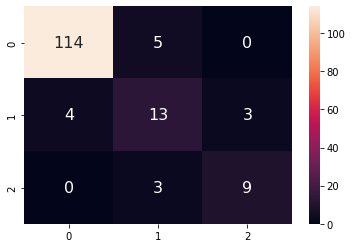

In [ ]:
sns.heatmap(DTC_pahang_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Pahang SMOTE

In [ ]:
#Pahang SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

DTC_pahang_smote = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_pahang_smote.fit(X_pahang_train_class_smote,y_pahang_train_class_smote)
DTC_pahang_ypred_smote= DTC_pahang_smote.predict(X_pahang_test_class_smote)

DTC_pahang_conf_max_smote = confusion_matrix(y_pahang_test_class_smote,DTC_pahang_ypred_smote)
print("Confusion matrix :")
print(DTC_pahang_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class_smote, DTC_pahang_ypred_smote)))
print(classification_report(y_pahang_test_class_smote,DTC_pahang_ypred_smote))

Confusion matrix :
[[119   0   0]
 [  4  11   5]
 [  0   2  10]]
Accuracy = 0.93
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       119
           2       0.85      0.55      0.67        20
           3       0.67      0.83      0.74        12

    accuracy                           0.93       151
   macro avg       0.83      0.79      0.80       151
weighted avg       0.93      0.93      0.92       151



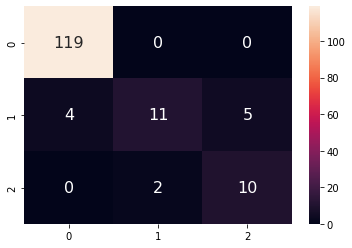

In [ ]:
sns.heatmap(DTC_pahang_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Kedah original

In [ ]:
#Kedah Ori
DTC_kedah = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_kedah.fit(X_kedah_train_class,y_kedah_train_class)
DTC_kedah_ypred = DTC_kedah.predict(X_kedah_test_class)

DTC_kedah_conf_max = confusion_matrix(y_kedah_test_class,DTC_kedah_ypred)
print("Confusion matrix :")
print(DTC_kedah_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class, DTC_kedah_ypred)))
print(classification_report(y_kedah_test_class,DTC_kedah_ypred))

Confusion matrix :
[[104   5   0   0   0]
 [  7  17   0   0   0]
 [  0   2   0   1   0]
 [  0   0   2  10   3]
 [  0   0   0   0   0]]
Accuracy = 0.87
              precision    recall  f1-score   support

           1       0.94      0.95      0.95       109
           2       0.71      0.71      0.71        24
           3       0.00      0.00      0.00         3
           4       0.91      0.67      0.77        15
           5       0.00      0.00      0.00         0

    accuracy                           0.87       151
   macro avg       0.51      0.47      0.48       151
weighted avg       0.88      0.87      0.87       151



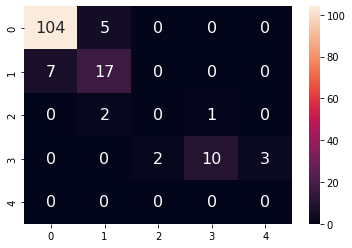

In [ ]:
sns.heatmap(DTC_kedah_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Kedah SMOTE

In [ ]:
#Kedah SMOTE
DTC_kedah_smote = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_kedah_smote.fit(X_kedah_train_class_smote,y_kedah_train_class_smote)
DTC_kedah_ypred_smote = DTC_kedah_smote.predict(X_kedah_test_class_smote)

DTC_kedah_conf_max_smote = confusion_matrix(y_kedah_test_class_smote,DTC_kedah_ypred_smote)
print("Confusion matrix :")
print(DTC_kedah_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class_smote, DTC_kedah_ypred_smote)))
print(classification_report(y_kedah_test_class_smote,DTC_kedah_ypred_smote))

Confusion matrix :
[[103   6   0   0]
 [  5  19   0   0]
 [  0   1   1   1]
 [  0   0   3  12]]
Accuracy = 0.89
              precision    recall  f1-score   support

           1       0.95      0.94      0.95       109
           2       0.73      0.79      0.76        24
           3       0.25      0.33      0.29         3
           4       0.92      0.80      0.86        15

    accuracy                           0.89       151
   macro avg       0.71      0.72      0.71       151
weighted avg       0.90      0.89      0.90       151



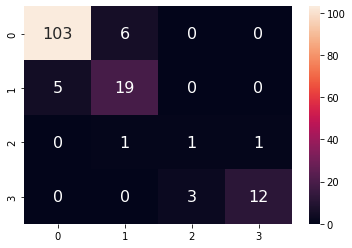

In [ ]:
sns.heatmap(DTC_kedah_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Selangor Original

In [ ]:
#Selangor Ori
DTC_selangor = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_selangor.fit(X_selangor_train_class,y_selangor_train_class)
DTC_selangor_ypred = DTC_selangor.predict(X_selangor_test_class)

DTC_selangor_conf_max = confusion_matrix(y_selangor_test_class,DTC_selangor_ypred)
print("Confusion matrix :")
print(DTC_selangor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class, DTC_selangor_ypred)))
print(classification_report(y_selangor_test_class,DTC_selangor_ypred))

Confusion matrix :
[[68  0  0  0  0]
 [ 0 15  6  0  0]
 [ 0  3 10  2  0]
 [ 0  2  5 13  2]
 [ 0  0  0  4 21]]
Accuracy = 0.84
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       0.75      0.71      0.73        21
           3       0.48      0.67      0.56        15
           4       0.68      0.59      0.63        22
           5       0.91      0.84      0.87        25

    accuracy                           0.84       151
   macro avg       0.76      0.76      0.76       151
weighted avg       0.85      0.84      0.84       151



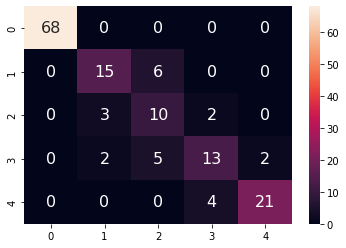

In [ ]:
sns.heatmap(DTC_selangor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Selangor SMOTE

In [ ]:
#Selangor SMOTE
DTC_selangor_smote = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_selangor_smote.fit(X_selangor_train_class_smote,y_selangor_train_class_smote)
DTC_selangor_ypred_smote = DTC_selangor_smote.predict(X_selangor_test_class_smote)

DTC_selangor_conf_max_smote = confusion_matrix(y_selangor_test_class_smote,DTC_selangor_ypred_smote)
print("Confusion matrix :")
print(DTC_selangor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class_smote, DTC_selangor_ypred_smote)))
print(classification_report(y_selangor_test_class_smote,DTC_selangor_ypred_smote))

Confusion matrix :
[[68  0  0  0  0]
 [ 0 14  7  0  0]
 [ 0  3  9  3  0]
 [ 0  1  4 14  3]
 [ 0  0  0  2 23]]
Accuracy = 0.85
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       0.78      0.67      0.72        21
           3       0.45      0.60      0.51        15
           4       0.74      0.64      0.68        22
           5       0.88      0.92      0.90        25

    accuracy                           0.85       151
   macro avg       0.77      0.76      0.76       151
weighted avg       0.86      0.85      0.85       151



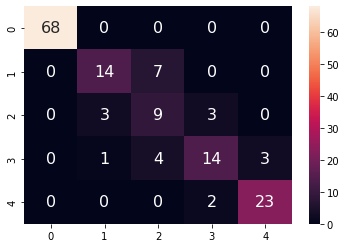

In [ ]:
sns.heatmap(DTC_selangor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Johor Original

In [ ]:
#Johor Ori
DTC_johor = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_johor.fit(X_johor_train_class,y_johor_train_class)
DTC_johor_ypred = DTC_johor.predict(X_johor_test_class)

DTC_johor_conf_max = confusion_matrix(y_johor_test_class,DTC_johor_ypred)
print("Confusion matrix :")
print(DTC_johor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class, DTC_johor_ypred)))
print(classification_report(y_johor_test_class,DTC_johor_ypred))

Confusion matrix :
[[77  5  0  0  0]
 [ 7 29  3  0  0]
 [ 0  7  5  2  0]
 [ 0  0  1  9  0]
 [ 0  0  0  3  3]]
Accuracy = 0.81
              precision    recall  f1-score   support

           1       0.92      0.94      0.93        82
           2       0.71      0.74      0.72        39
           3       0.56      0.36      0.43        14
           4       0.64      0.90      0.75        10
           5       1.00      0.50      0.67         6

    accuracy                           0.81       151
   macro avg       0.76      0.69      0.70       151
weighted avg       0.81      0.81      0.81       151



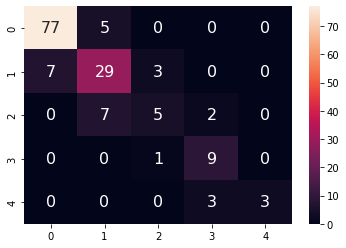

In [ ]:
sns.heatmap(DTC_johor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Johor SMOTE

In [ ]:
#Johor SMOTE
DTC_johor_smote = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC_johor_smote.fit(X_johor_train_class_smote,y_johor_train_class_smote)
DTC_johor_ypred_smote = DTC_johor_smote.predict(X_johor_test_class_smote)

DTC_johor_conf_max_smote = confusion_matrix(y_johor_test_class_smote,DTC_johor_ypred_smote)
print("Confusion matrix :")
print(DTC_johor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class_smote, DTC_johor_ypred_smote)))
print(classification_report(y_johor_test_class_smote,DTC_johor_ypred_smote))

Confusion matrix :
[[80  2  0  0  0]
 [ 5 25  8  1  0]
 [ 0  7  7  0  0]
 [ 0  1  1  8  0]
 [ 0  0  0  3  3]]
Accuracy = 0.81
              precision    recall  f1-score   support

           1       0.94      0.98      0.96        82
           2       0.71      0.64      0.68        39
           3       0.44      0.50      0.47        14
           4       0.67      0.80      0.73        10
           5       1.00      0.50      0.67         6

    accuracy                           0.81       151
   macro avg       0.75      0.68      0.70       151
weighted avg       0.82      0.81      0.81       151



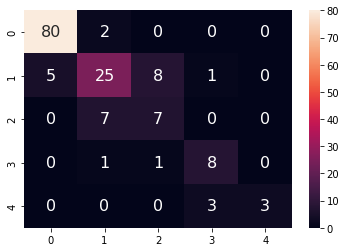

In [ ]:
sns.heatmap(DTC_johor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

#2. Random Forest Classifier

Pahang Original

In [ ]:
#Pahang Ori
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

RFC_pahang = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_pahang.fit(X_pahang_train_class,y_pahang_train_class)
RFC_pahang_ypred = RFC_pahang.predict(X_pahang_test_class)

RFC_pahang_conf_max = confusion_matrix(y_pahang_test_class,RFC_pahang_ypred)
print("Confusion matrix :")
print(RFC_pahang_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class, RFC_pahang_ypred)))
print(classification_report(y_pahang_test_class,RFC_pahang_ypred))

Confusion matrix :
[[118   1   0]
 [  5  12   3]
 [  0   0  12]]
Accuracy = 0.94
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       119
           2       0.92      0.60      0.73        20
           3       0.80      1.00      0.89        12

    accuracy                           0.94       151
   macro avg       0.89      0.86      0.86       151
weighted avg       0.94      0.94      0.94       151



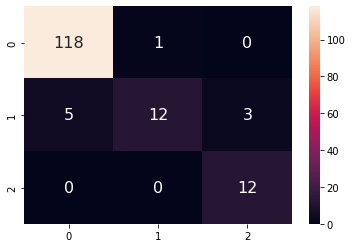

In [ ]:
sns.heatmap(RFC_pahang_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Pahang SMOTE

In [ ]:
#Pahang SMOTE
RFC_pahang_smote = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_pahang_smote.fit(X_pahang_train_class_smote,y_pahang_train_class_smote)
RFC_pahang_ypred_smote = RFC_pahang_smote.predict(X_pahang_test_class_smote)

RFC_pahang_conf_max_smote = confusion_matrix(y_pahang_test_class_smote,RFC_pahang_ypred_smote)
print("Confusion matrix :")
print(RFC_pahang_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class_smote, RFC_pahang_ypred_smote)))
print(classification_report(y_pahang_test_class_smote,RFC_pahang_ypred_smote))

Confusion matrix :
[[118   1   0]
 [  5  12   3]
 [  0   1  11]]
Accuracy = 0.93
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       119
           2       0.86      0.60      0.71        20
           3       0.79      0.92      0.85        12

    accuracy                           0.93       151
   macro avg       0.87      0.84      0.84       151
weighted avg       0.93      0.93      0.93       151



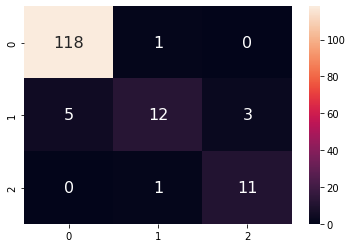

In [ ]:
sns.heatmap(RFC_pahang_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Kedah Original


In [ ]:
#Kedah Ori
RFC_kedah = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_kedah.fit(X_kedah_train_class,y_kedah_train_class)
RFC_kedah_ypred = RFC_kedah.predict(X_kedah_test_class)

RFC_kedah_conf_max = confusion_matrix(y_kedah_test_class,RFC_kedah_ypred)
print("Confusion matrix :")
print(RFC_kedah_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class, RFC_kedah_ypred)))
print(classification_report(y_kedah_test_class,RFC_kedah_ypred))

Confusion matrix :
[[108   1   0   0]
 [  8  16   0   0]
 [  0   1   2   0]
 [  0   0   2  13]]
Accuracy = 0.92
              precision    recall  f1-score   support

           1       0.93      0.99      0.96       109
           2       0.89      0.67      0.76        24
           3       0.50      0.67      0.57         3
           4       1.00      0.87      0.93        15

    accuracy                           0.92       151
   macro avg       0.83      0.80      0.81       151
weighted avg       0.92      0.92      0.92       151



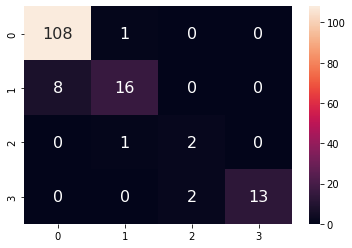

In [ ]:
sns.heatmap(RFC_kedah_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Kedah SMOTE

In [ ]:
#Kedah SMOTE
RFC_kedah_smote = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_kedah_smote.fit(X_kedah_train_class_smote,y_kedah_train_class_smote)
RFC_kedah_ypred_smote = RFC_kedah_smote.predict(X_kedah_test_class_smote)

RFC_kedah_conf_max_smote = confusion_matrix(y_kedah_test_class_smote,RFC_kedah_ypred_smote)
print("Confusion matrix :")
print(RFC_kedah_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class_smote, RFC_kedah_ypred_smote)))
print(classification_report(y_kedah_test_class_smote,RFC_kedah_ypred_smote))

Confusion matrix :
[[105   4   0   0   0]
 [  6  18   0   0   0]
 [  0   1   1   1   0]
 [  0   0   1  13   1]
 [  0   0   0   0   0]]
Accuracy = 0.91
              precision    recall  f1-score   support

           1       0.95      0.96      0.95       109
           2       0.78      0.75      0.77        24
           3       0.50      0.33      0.40         3
           4       0.93      0.87      0.90        15
           5       0.00      0.00      0.00         0

    accuracy                           0.91       151
   macro avg       0.63      0.58      0.60       151
weighted avg       0.91      0.91      0.91       151



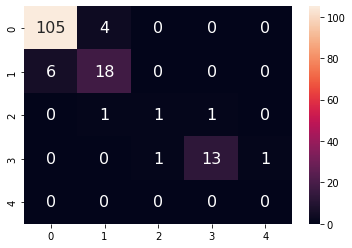

In [ ]:
sns.heatmap(RFC_kedah_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Selangor Original

In [ ]:
#Selangor Ori
RFC_selangor = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_selangor.fit(X_selangor_train_class,y_selangor_train_class)
RFC_selangor_ypred = RFC_selangor.predict(X_selangor_test_class)

RFC_selangor_conf_max = confusion_matrix(y_selangor_test_class,RFC_selangor_ypred)
print("Confusion matrix :")
print(RFC_selangor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class, RFC_selangor_ypred)))
print(classification_report(y_selangor_test_class,RFC_selangor_ypred))

Confusion matrix :
[[68  0  0  0  0]
 [ 0 15  6  0  0]
 [ 0  2 12  1  0]
 [ 0  1  7 10  4]
 [ 0  0  0  2 23]]
Accuracy = 0.85
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       0.83      0.71      0.77        21
           3       0.48      0.80      0.60        15
           4       0.77      0.45      0.57        22
           5       0.85      0.92      0.88        25

    accuracy                           0.85       151
   macro avg       0.79      0.78      0.77       151
weighted avg       0.87      0.85      0.85       151



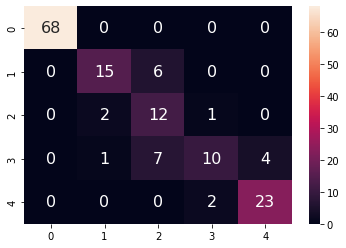

In [ ]:
sns.heatmap(RFC_selangor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Selangor SMOTE

In [ ]:
#Selangor SMOTE
RFC_selangor_smote = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_selangor_smote.fit(X_selangor_train_class_smote,y_selangor_train_class_smote)
RFC_selangor_ypred_smote = RFC_selangor_smote.predict(X_selangor_test_class_smote)

RFC_selangor_conf_max_smote = confusion_matrix(y_selangor_test_class_smote,RFC_selangor_ypred_smote)
print("Confusion matrix :")
print(RFC_selangor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class_smote, RFC_selangor_ypred_smote)))
print(classification_report(y_selangor_test_class_smote,RFC_selangor_ypred_smote))

Confusion matrix :
[[68  0  0  0  0]
 [ 0 16  5  0  0]
 [ 0  2 13  0  0]
 [ 0  2  6 11  3]
 [ 0  0  0  1 24]]
Accuracy = 0.87
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       0.80      0.76      0.78        21
           3       0.54      0.87      0.67        15
           4       0.92      0.50      0.65        22
           5       0.89      0.96      0.92        25

    accuracy                           0.87       151
   macro avg       0.83      0.82      0.80       151
weighted avg       0.90      0.87      0.87       151



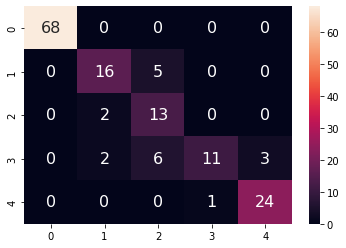

In [ ]:
sns.heatmap(RFC_selangor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Johor Original

In [ ]:
#Johor Ori
RFC_johor = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_johor.fit(X_johor_train_class,y_johor_train_class)
RFC_johor_ypred = RFC_johor.predict(X_johor_test_class)

RFC_johor_conf_max = confusion_matrix(y_johor_test_class,RFC_johor_ypred)
print("Confusion matrix :")
print(RFC_johor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class, RFC_johor_ypred)))
print(classification_report(y_johor_test_class,RFC_johor_ypred))

Confusion matrix :
[[80  2  0  0  0]
 [ 5 33  1  0  0]
 [ 0  8  6  0  0]
 [ 0  1  0  8  1]
 [ 0  0  1  1  4]]
Accuracy = 0.87
              precision    recall  f1-score   support

           1       0.94      0.98      0.96        82
           2       0.75      0.85      0.80        39
           3       0.75      0.43      0.55        14
           4       0.89      0.80      0.84        10
           5       0.80      0.67      0.73         6

    accuracy                           0.87       151
   macro avg       0.83      0.74      0.77       151
weighted avg       0.87      0.87      0.86       151



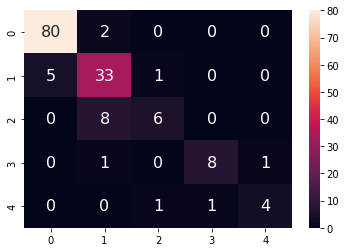

In [ ]:
sns.heatmap(RFC_johor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Johor SMOTE

In [ ]:
#Johor SMOTE
RFC_johor_smote = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
RFC_johor_smote.fit(X_johor_train_class_smote,y_johor_train_class_smote)
RFC_johor_ypred_smote = RFC_johor_smote.predict(X_johor_test_class_smote)

RFC_johor_conf_max_smote = confusion_matrix(y_johor_test_class_smote,RFC_johor_ypred_smote)
print("Confusion matrix :")
print(RFC_johor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class_smote, RFC_johor_ypred_smote)))
print(classification_report(y_johor_test_class_smote,RFC_johor_ypred_smote))

Confusion matrix :
[[79  3  0  0  0]
 [ 4 32  3  0  0]
 [ 0  9  5  0  0]
 [ 0  1  1  8  0]
 [ 0  0  0  4  2]]
Accuracy = 0.83
              precision    recall  f1-score   support

           1       0.95      0.96      0.96        82
           2       0.71      0.82      0.76        39
           3       0.56      0.36      0.43        14
           4       0.67      0.80      0.73        10
           5       1.00      0.33      0.50         6

    accuracy                           0.83       151
   macro avg       0.78      0.65      0.68       151
weighted avg       0.84      0.83      0.83       151



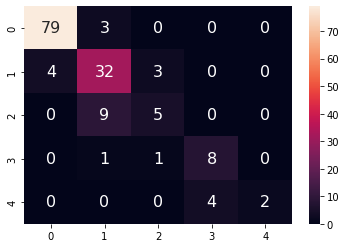

In [ ]:
sns.heatmap(RFC_johor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

#3. Support Vector Machine

Pahang Original

In [ ]:
#Pahang Ori
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

SVC_pahang = SVC(kernel='linear', random_state=0)
SVC_pahang.fit(X_pahang_train_class,y_pahang_train_class)
SVC_pahang_ypred = SVC_pahang.predict(X_pahang_test_class)

SVC_pahang_conf_max = confusion_matrix(y_pahang_test_class,SVC_pahang_ypred)
print("Confusion matrix :")
print(SVC_pahang_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class, SVC_pahang_ypred)))
print(classification_report(y_pahang_test_class,SVC_pahang_ypred))

Confusion matrix :
[[117   2   0]
 [  4  14   2]
 [  0   1  11]]
Accuracy = 0.94
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       119
           2       0.82      0.70      0.76        20
           3       0.85      0.92      0.88        12

    accuracy                           0.94       151
   macro avg       0.88      0.87      0.87       151
weighted avg       0.94      0.94      0.94       151



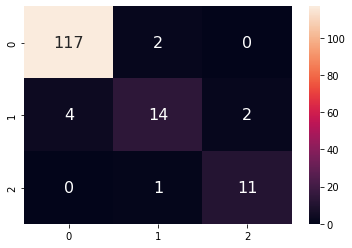

In [ ]:
sns.heatmap(SVC_pahang_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Pahang SMOTE

In [ ]:
#Pahang SMOTE
SVC_pahang_smote = SVC(kernel='linear', random_state=0)
SVC_pahang_smote.fit(X_pahang_train_class_smote,y_pahang_train_class_smote)
SVC_pahang_ypred_smote = SVC_pahang_smote.predict(X_pahang_test_class_smote)

SVC_pahang_conf_max_smote = confusion_matrix(y_pahang_test_class_smote,SVC_pahang_ypred_smote)
print("Confusion matrix :")
print(SVC_pahang_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class_smote, SVC_pahang_ypred_smote)))
print(classification_report(y_pahang_test_class_smote,SVC_pahang_ypred_smote))

Confusion matrix :
[[112   7   0]
 [  2  16   2]
 [  0   1  11]]
Accuracy = 0.92
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       119
           2       0.67      0.80      0.73        20
           3       0.85      0.92      0.88        12

    accuracy                           0.92       151
   macro avg       0.83      0.89      0.86       151
weighted avg       0.93      0.92      0.92       151



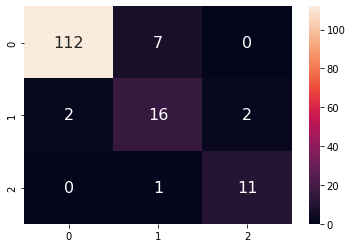

In [ ]:
sns.heatmap(SVC_pahang_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Kedah Original

In [ ]:
#Kedah Ori
SVC_kedah = SVC(kernel='linear', random_state=0)
SVC_kedah.fit(X_kedah_train_class,y_kedah_train_class)
SVC_kedah_ypred = SVC_kedah.predict(X_kedah_test_class)

SVC_kedah_conf_max = confusion_matrix(y_kedah_test_class,SVC_kedah_ypred)
print("Confusion matrix :")
print(SVC_kedah_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class, SVC_kedah_ypred)))
print(classification_report(y_kedah_test_class,SVC_kedah_ypred))

Confusion matrix :
[[107   2   0   0   0]
 [  8  16   0   0   0]
 [  0   2   0   1   0]
 [  0   0   1  11   3]
 [  0   0   0   0   0]]
Accuracy = 0.89
              precision    recall  f1-score   support

           1       0.93      0.98      0.96       109
           2       0.80      0.67      0.73        24
           3       0.00      0.00      0.00         3
           4       0.92      0.73      0.81        15
           5       0.00      0.00      0.00         0

    accuracy                           0.89       151
   macro avg       0.53      0.48      0.50       151
weighted avg       0.89      0.89      0.89       151



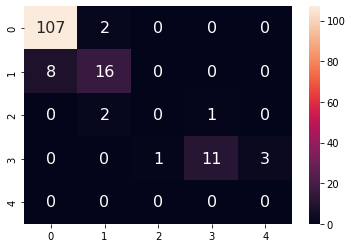

In [ ]:
sns.heatmap(SVC_kedah_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Kedah SMOTE

In [ ]:
#Kedah SMOTE
SVC_kedah_smote = SVC(kernel='linear', random_state=0)
SVC_kedah_smote.fit(X_kedah_train_class_smote,y_kedah_train_class_smote)
SVC_kedah_ypred_smote = SVC_kedah_smote.predict(X_kedah_test_class_smote)

SVC_kedah_conf_max_smote = confusion_matrix(y_kedah_test_class_smote,SVC_kedah_ypred_smote)
print("Confusion matrix :")
print(SVC_kedah_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class_smote, SVC_kedah_ypred_smote)))
print(classification_report(y_kedah_test_class_smote,SVC_kedah_ypred_smote))

Confusion matrix :
[[98 11  0  0  0]
 [ 7 17  0  0  0]
 [ 0  1  1  1  0]
 [ 0  0  3 11  1]
 [ 0  0  0  0  0]]
Accuracy = 0.84
              precision    recall  f1-score   support

           1       0.93      0.90      0.92       109
           2       0.59      0.71      0.64        24
           3       0.25      0.33      0.29         3
           4       0.92      0.73      0.81        15
           5       0.00      0.00      0.00         0

    accuracy                           0.84       151
   macro avg       0.54      0.53      0.53       151
weighted avg       0.86      0.84      0.85       151



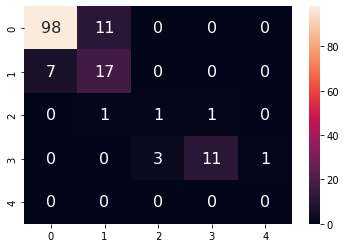

In [ ]:
sns.heatmap(SVC_kedah_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Selangor Original

In [ ]:
#Selangor Ori
SVC_selangor = SVC(kernel='linear', random_state=0)
SVC_selangor.fit(X_selangor_train_class,y_selangor_train_class)
SVC_selangor_ypred = SVC_selangor.predict(X_selangor_test_class)

SVC_selangor_conf_max = confusion_matrix(y_selangor_test_class,SVC_selangor_ypred)
print("Confusion matrix :")
print(SVC_selangor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class, SVC_selangor_ypred)))
print(classification_report(y_selangor_test_class,SVC_selangor_ypred))

Confusion matrix :
[[68  0  0  0  0]
 [ 0 16  5  0  0]
 [ 0  3  9  3  0]
 [ 0  2  7 11  2]
 [ 0  0  0  1 24]]
Accuracy = 0.85
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       0.76      0.76      0.76        21
           3       0.43      0.60      0.50        15
           4       0.73      0.50      0.59        22
           5       0.92      0.96      0.94        25

    accuracy                           0.85       151
   macro avg       0.77      0.76      0.76       151
weighted avg       0.86      0.85      0.85       151



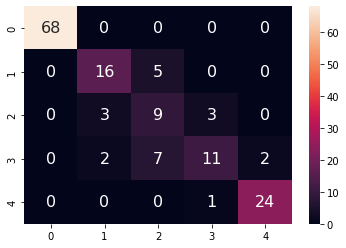

In [ ]:
sns.heatmap(SVC_selangor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Selangor SMOTE

In [ ]:
#Selangor SMOTE
SVC_selangor_smote = SVC(kernel='linear', random_state=0)
SVC_selangor_smote.fit(X_selangor_train_class_smote,y_selangor_train_class_smote)
SVC_selangor_ypred_smote = SVC_selangor_smote.predict(X_selangor_test_class_smote)

SVC_selangor_conf_max_smote = confusion_matrix(y_selangor_test_class_smote,SVC_selangor_ypred_smote)
print("Confusion matrix :")
print(SVC_selangor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class_smote, SVC_selangor_ypred_smote)))
print(classification_report(y_selangor_test_class_smote,SVC_selangor_ypred_smote))

Confusion matrix :
[[68  0  0  0  0]
 [ 1 13  6  1  0]
 [ 0  3 10  2  0]
 [ 0  1 11  8  2]
 [ 0  0  0  2 23]]
Accuracy = 0.81
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        68
           2       0.76      0.62      0.68        21
           3       0.37      0.67      0.48        15
           4       0.62      0.36      0.46        22
           5       0.92      0.92      0.92        25

    accuracy                           0.81       151
   macro avg       0.73      0.71      0.71       151
weighted avg       0.83      0.81      0.81       151



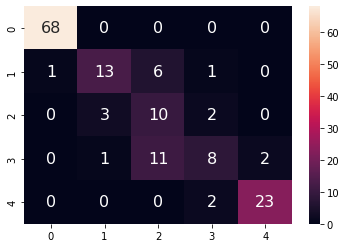

In [ ]:
sns.heatmap(SVC_selangor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Johor Original

In [ ]:
#Johor Ori
SVC_johor = SVC(kernel='linear', random_state=0)
SVC_johor.fit(X_johor_train_class,y_johor_train_class)
SVC_johor_ypred = SVC_johor.predict(X_johor_test_class)

SVC_johor_conf_max = confusion_matrix(y_johor_test_class,SVC_johor_ypred)
print("Confusion matrix :")
print(SVC_johor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class, SVC_johor_ypred)))
print(classification_report(y_johor_test_class,SVC_johor_ypred))

Confusion matrix :
[[80  2  0  0  0]
 [ 6 29  4  0  0]
 [ 0 12  2  0  0]
 [ 0  2  0  6  2]
 [ 0  0  0  4  2]]
Accuracy = 0.79
              precision    recall  f1-score   support

           1       0.93      0.98      0.95        82
           2       0.64      0.74      0.69        39
           3       0.33      0.14      0.20        14
           4       0.60      0.60      0.60        10
           5       0.50      0.33      0.40         6

    accuracy                           0.79       151
   macro avg       0.60      0.56      0.57       151
weighted avg       0.76      0.79      0.77       151



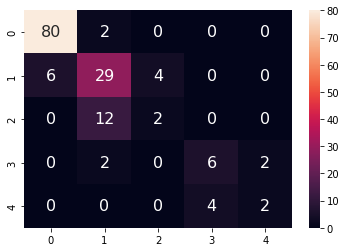

In [ ]:
sns.heatmap(SVC_johor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Johor SMOTE

In [ ]:
#Johor SMOTE
SVC_johor_smote = SVC(kernel='linear', random_state=0)
SVC_johor_smote.fit(X_johor_train_class_smote,y_johor_train_class_smote)
SVC_johor_ypred_smote = SVC_johor_smote.predict(X_johor_test_class_smote)

SVC_johor_conf_max_smote = confusion_matrix(y_johor_test_class_smote,SVC_johor_ypred_smote)
print("Confusion matrix :")
print(SVC_johor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class_smote, SVC_johor_ypred_smote)))
print(classification_report(y_johor_test_class_smote,SVC_johor_ypred_smote))

Confusion matrix :
[[78  4  0  0  0]
 [ 6 23 10  0  0]
 [ 0  8  5  1  0]
 [ 0  1  3  5  1]
 [ 0  0  0  5  1]]
Accuracy = 0.74
              precision    recall  f1-score   support

           1       0.93      0.95      0.94        82
           2       0.64      0.59      0.61        39
           3       0.28      0.36      0.31        14
           4       0.45      0.50      0.48        10
           5       0.50      0.17      0.25         6

    accuracy                           0.74       151
   macro avg       0.56      0.51      0.52       151
weighted avg       0.74      0.74      0.74       151



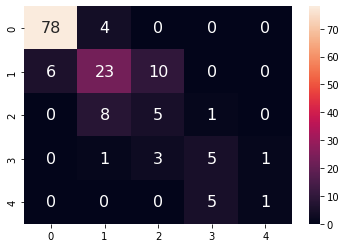

In [ ]:
sns.heatmap(SVC_johor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

#4. Naive Bayes

Pahang Original

In [ ]:
#Pahang Ori
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
NB_pahang = GaussianNB()
NB_pahang.fit(X_pahang_train_class,y_pahang_train_class)
NB_pahang_ypred = NB_pahang.predict(X_pahang_test_class)

NB_pahang_conf_max = confusion_matrix(y_pahang_test_class,NB_pahang_ypred)
print("Confusion matrix :")
print(NB_pahang_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class, NB_pahang_ypred)))
print(classification_report(y_pahang_test_class,NB_pahang_ypred))

Confusion matrix :
[[112   7   0]
 [  2  14   4]
 [  0   0  12]]
Accuracy = 0.91
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       119
           2       0.67      0.70      0.68        20
           3       0.75      1.00      0.86        12

    accuracy                           0.91       151
   macro avg       0.80      0.88      0.83       151
weighted avg       0.92      0.91      0.92       151



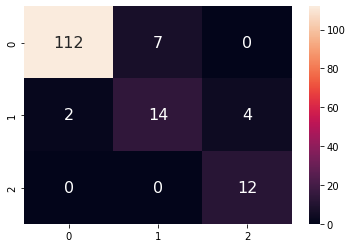

In [ ]:
sns.heatmap(NB_pahang_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Pahang SMOTE

In [ ]:
#Pahang SMOTE
NB_pahang_smote = GaussianNB()
NB_pahang_smote.fit(X_pahang_train_class_smote,y_pahang_train_class_smote)
NB_pahang_ypred_smote = NB_pahang_smote.predict(X_pahang_test_class_smote)

NB_pahang_conf_max_smote = confusion_matrix(y_pahang_test_class_smote,NB_pahang_ypred_smote)
print("Confusion matrix :")
print(NB_pahang_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class_smote, NB_pahang_ypred_smote)))
print(classification_report(y_pahang_test_class_smote,NB_pahang_ypred_smote))

Confusion matrix :
[[112   7   0]
 [  2  14   4]
 [  0   0  12]]
Accuracy = 0.91
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       119
           2       0.67      0.70      0.68        20
           3       0.75      1.00      0.86        12

    accuracy                           0.91       151
   macro avg       0.80      0.88      0.83       151
weighted avg       0.92      0.91      0.92       151



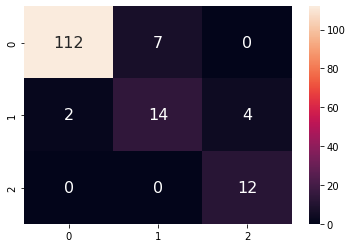

In [ ]:
sns.heatmap(NB_pahang_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Kedah Original

In [ ]:
#Kedah Ori
NB_kedah = GaussianNB()
NB_kedah.fit(X_kedah_train_class,y_kedah_train_class)
NB_kedah_ypred = NB_kedah.predict(X_kedah_test_class)

NB_kedah_conf_max = confusion_matrix(y_kedah_test_class,NB_kedah_ypred)
print("Confusion matrix :")
print(NB_kedah_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class, NB_kedah_ypred)))
print(classification_report(y_kedah_test_class,NB_kedah_ypred))

Confusion matrix :
[[101   8   0   0   0]
 [  5  19   0   0   0]
 [  0   1   2   0   0]
 [  0   0   2   9   4]
 [  0   0   0   0   0]]
Accuracy = 0.87
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       109
           2       0.68      0.79      0.73        24
           3       0.50      0.67      0.57         3
           4       1.00      0.60      0.75        15
           5       0.00      0.00      0.00         0

    accuracy                           0.87       151
   macro avg       0.63      0.60      0.60       151
weighted avg       0.90      0.87      0.88       151



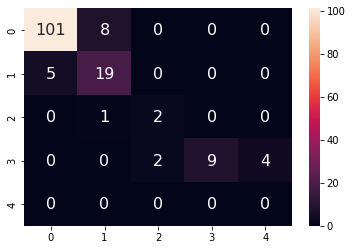

In [ ]:
sns.heatmap(NB_kedah_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Kedah SMOTE 

In [ ]:
#Kedah SMOTE
NB_kedah_smote = GaussianNB()
NB_kedah_smote.fit(X_kedah_train_class_smote,y_kedah_train_class_smote)
NB_kedah_ypred_smote = NB_kedah_smote.predict(X_kedah_test_class_smote)

NB_kedah_conf_max_smote = confusion_matrix(y_kedah_test_class_smote,NB_kedah_ypred_smote)
print("Confusion matrix :")
print(NB_kedah_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class_smote, NB_kedah_ypred_smote)))
print(classification_report(y_kedah_test_class_smote,NB_kedah_ypred_smote))

Confusion matrix :
[[102   7   0   0   0]
 [  5  19   0   0   0]
 [  0   1   2   0   0]
 [  0   0   1  12   2]
 [  0   0   0   0   0]]
Accuracy = 0.89
              precision    recall  f1-score   support

           1       0.95      0.94      0.94       109
           2       0.70      0.79      0.75        24
           3       0.67      0.67      0.67         3
           4       1.00      0.80      0.89        15
           5       0.00      0.00      0.00         0

    accuracy                           0.89       151
   macro avg       0.66      0.64      0.65       151
weighted avg       0.91      0.89      0.90       151



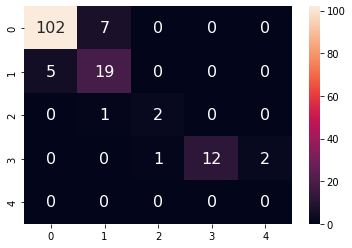

In [ ]:
sns.heatmap(NB_kedah_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Selangor Original

In [ ]:
#Selangor Ori
NB_selangor = GaussianNB()
NB_selangor.fit(X_selangor_train_class,y_selangor_train_class)
NB_selangor_ypred = NB_selangor.predict(X_selangor_test_class)

NB_selangor_conf_max = confusion_matrix(y_selangor_test_class,NB_selangor_ypred)
print("Confusion matrix :")
print(NB_selangor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class, NB_selangor_ypred)))
print(classification_report(y_selangor_test_class,NB_selangor_ypred))

Confusion matrix :
[[66  2  0  0  0]
 [ 0 19  2  0  0]
 [ 0  2 10  3  0]
 [ 0  2  5 12  3]
 [ 0  0  0  4 21]]
Accuracy = 0.85
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        68
           2       0.76      0.90      0.83        21
           3       0.59      0.67      0.62        15
           4       0.63      0.55      0.59        22
           5       0.88      0.84      0.86        25

    accuracy                           0.85       151
   macro avg       0.77      0.79      0.78       151
weighted avg       0.85      0.85      0.85       151



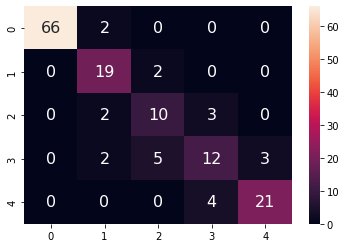

In [ ]:
sns.heatmap(NB_selangor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Selangor SMOTE

In [ ]:
#Selangor SMOTE
NB_selangor_smote = GaussianNB()
NB_selangor_smote.fit(X_selangor_train_class_smote,y_selangor_train_class_smote)
NB_selangor_ypred_smote = NB_selangor_smote.predict(X_selangor_test_class_smote)

NB_selangor_conf_max_smote = confusion_matrix(y_selangor_test_class_smote,NB_selangor_ypred_smote)
print("Confusion matrix :")
print(NB_selangor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class_smote, NB_selangor_ypred_smote)))
print(classification_report(y_selangor_test_class_smote,NB_selangor_ypred_smote))

Confusion matrix :
[[66  2  0  0  0]
 [ 0 19  2  0  0]
 [ 0  2 10  3  0]
 [ 0  2  5 12  3]
 [ 0  0  0  4 21]]
Accuracy = 0.85
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        68
           2       0.76      0.90      0.83        21
           3       0.59      0.67      0.62        15
           4       0.63      0.55      0.59        22
           5       0.88      0.84      0.86        25

    accuracy                           0.85       151
   macro avg       0.77      0.79      0.78       151
weighted avg       0.85      0.85      0.85       151



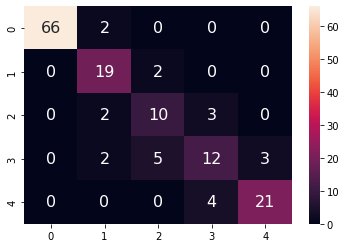

In [ ]:
sns.heatmap(NB_selangor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Johor Original

In [ ]:
#Johor Ori
NB_johor = GaussianNB()
NB_johor.fit(X_johor_train_class,y_johor_train_class)
NB_johor_ypred = NB_johor.predict(X_johor_test_class)

NB_johor_conf_max = confusion_matrix(y_johor_test_class,NB_johor_ypred)
print("Confusion matrix :")
print(NB_johor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class, NB_johor_ypred)))
print(classification_report(y_johor_test_class,NB_johor_ypred))

Confusion matrix :
[[77  5  0  0  0]
 [ 2 30  7  0  0]
 [ 0 10  3  1  0]
 [ 0  1  1  7  1]
 [ 0  0  0  1  5]]
Accuracy = 0.81
              precision    recall  f1-score   support

           1       0.97      0.94      0.96        82
           2       0.65      0.77      0.71        39
           3       0.27      0.21      0.24        14
           4       0.78      0.70      0.74        10
           5       0.83      0.83      0.83         6

    accuracy                           0.81       151
   macro avg       0.70      0.69      0.69       151
weighted avg       0.81      0.81      0.81       151



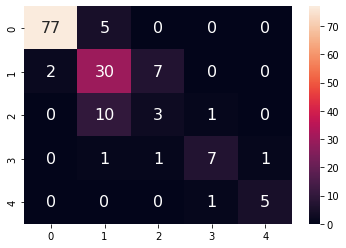

In [ ]:
sns.heatmap(NB_johor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Johor SMOTE

In [ ]:
#Johor SMOTE
NB_johor_smote = GaussianNB()
NB_johor_smote.fit(X_johor_train_class_smote,y_johor_train_class_smote)
NB_johor_ypred_smote = NB_johor_smote.predict(X_johor_test_class_smote)

NB_johor_conf_max_smote = confusion_matrix(y_johor_test_class_smote,NB_johor_ypred_smote)
print("Confusion matrix :")
print(NB_johor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class_smote, NB_johor_ypred_smote)))
print(classification_report(y_johor_test_class_smote,NB_johor_ypred_smote))

Confusion matrix :
[[75  7  0  0  0]
 [ 1 29  9  0  0]
 [ 0 10  3  1  0]
 [ 0  1  1  7  1]
 [ 0  0  0  2  4]]
Accuracy = 0.78
              precision    recall  f1-score   support

           1       0.99      0.91      0.95        82
           2       0.62      0.74      0.67        39
           3       0.23      0.21      0.22        14
           4       0.70      0.70      0.70        10
           5       0.80      0.67      0.73         6

    accuracy                           0.78       151
   macro avg       0.67      0.65      0.65       151
weighted avg       0.79      0.78      0.79       151



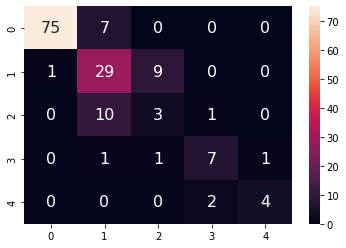

In [ ]:
sns.heatmap(NB_johor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

#5. KNN

Pahang Original

In [ ]:
#Pahang Ori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

KNN_pahang = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_pahang.fit(X_pahang_train_class,y_pahang_train_class)
KNN_pahang_ypred = KNN_pahang.predict(X_pahang_test_class)

KNN_pahang_conf_max = confusion_matrix(y_pahang_test_class,KNN_pahang_ypred)
print("Confusion matrix :")
print(KNN_pahang_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class, KNN_pahang_ypred)))
print(classification_report(y_pahang_test_class,KNN_pahang_ypred))

Confusion matrix :
[[118   1   0]
 [  3  14   3]
 [  0   0  12]]
Accuracy = 0.95
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       119
           2       0.93      0.70      0.80        20
           3       0.80      1.00      0.89        12

    accuracy                           0.95       151
   macro avg       0.90      0.90      0.89       151
weighted avg       0.96      0.95      0.95       151



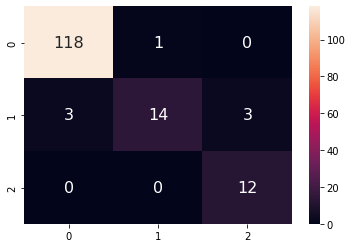

In [ ]:
sns.heatmap(KNN_pahang_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Pahang SMOTE

In [ ]:
#Pahang SMOTE
KNN_pahang_smote = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_pahang_smote.fit(X_pahang_train_class_smote,y_pahang_train_class_smote)
KNN_pahang_ypred_smote = KNN_pahang_smote.predict(X_pahang_test_class_smote)

KNN_pahang_conf_max_smote = confusion_matrix(y_pahang_test_class_smote,KNN_pahang_ypred_smote)
print("Confusion matrix :")
print(KNN_pahang_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_pahang_test_class_smote, KNN_pahang_ypred_smote)))
print(classification_report(y_pahang_test_class_smote,KNN_pahang_ypred_smote))

Confusion matrix :
[[112   7   0]
 [  5  10   5]
 [  1   2   9]]
Accuracy = 0.87
              precision    recall  f1-score   support

           1       0.95      0.94      0.95       119
           2       0.53      0.50      0.51        20
           3       0.64      0.75      0.69        12

    accuracy                           0.87       151
   macro avg       0.71      0.73      0.72       151
weighted avg       0.87      0.87      0.87       151



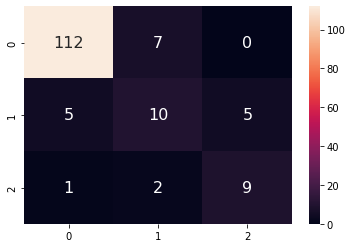

In [ ]:
sns.heatmap(KNN_pahang_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Kedah Original

In [ ]:
#Kedah Ori
KNN_kedah = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_kedah.fit(X_kedah_train_class,y_kedah_train_class)
KNN_kedah_ypred = KNN_kedah.predict(X_kedah_test_class)

KNN_kedah_conf_max = confusion_matrix(y_kedah_test_class,KNN_kedah_ypred)
print("Confusion matrix :")
print(KNN_kedah_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class, KNN_kedah_ypred)))
print(classification_report(y_kedah_test_class,KNN_kedah_ypred))

Confusion matrix :
[[103   6   0   0   0]
 [  6  18   0   0   0]
 [  0   1   1   1   0]
 [  0   0   0  14   1]
 [  0   0   0   0   0]]
Accuracy = 0.90
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       109
           2       0.72      0.75      0.73        24
           3       1.00      0.33      0.50         3
           4       0.93      0.93      0.93        15
           5       0.00      0.00      0.00         0

    accuracy                           0.90       151
   macro avg       0.72      0.59      0.62       151
weighted avg       0.91      0.90      0.90       151



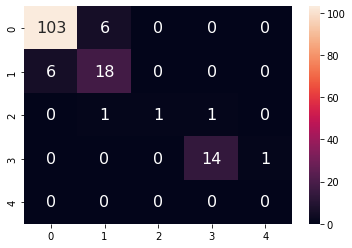

In [ ]:
sns.heatmap(KNN_kedah_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Kedah SMOTE

In [ ]:
#Kedah SMOTE
KNN_kedah_smote = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_kedah_smote.fit(X_kedah_train_class_smote,y_kedah_train_class_smote)
KNN_kedah_ypred_smote = KNN_kedah_smote.predict(X_kedah_test_class_smote)

KNN_kedah_conf_max_smote = confusion_matrix(y_kedah_test_class_smote,KNN_kedah_ypred_smote)
print("Confusion matrix :")
print(KNN_kedah_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_kedah_test_class_smote, KNN_kedah_ypred_smote)))
print(classification_report(y_kedah_test_class_smote,KNN_kedah_ypred_smote))

Confusion matrix :
[[93 16  0  0  0]
 [ 6 18  0  0  0]
 [ 0  0  1  2  0]
 [ 0  1  5  5  4]
 [ 0  0  0  0  0]]
Accuracy = 0.77
              precision    recall  f1-score   support

           1       0.94      0.85      0.89       109
           2       0.51      0.75      0.61        24
           3       0.17      0.33      0.22         3
           4       0.71      0.33      0.45        15
           5       0.00      0.00      0.00         0

    accuracy                           0.77       151
   macro avg       0.47      0.45      0.44       151
weighted avg       0.83      0.77      0.79       151



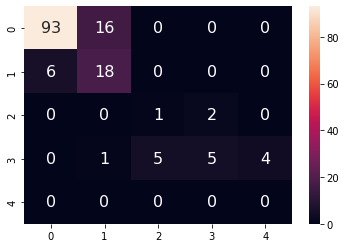

In [ ]:
sns.heatmap(KNN_kedah_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Selangor Original

In [ ]:
#Selangor Ori
KNN_selangor = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_selangor.fit(X_selangor_train_class,y_selangor_train_class)
KNN_selangor_ypred = KNN_selangor.predict(X_selangor_test_class)

KNN_selangor_conf_max = confusion_matrix(y_selangor_test_class,KNN_selangor_ypred)
print("Confusion matrix :")
print(KNN_selangor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class, KNN_selangor_ypred)))
print(classification_report(y_selangor_test_class,KNN_selangor_ypred))

Confusion matrix :
[[68  0  0  0  0]
 [ 0 20  1  0  0]
 [ 0  3  9  3  0]
 [ 0  2  5 12  3]
 [ 0  0  0  0 25]]
Accuracy = 0.89
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        68
           2       0.80      0.95      0.87        21
           3       0.60      0.60      0.60        15
           4       0.80      0.55      0.65        22
           5       0.89      1.00      0.94        25

    accuracy                           0.89       151
   macro avg       0.82      0.82      0.81       151
weighted avg       0.89      0.89      0.88       151



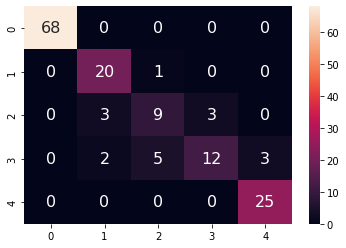

In [ ]:
sns.heatmap(KNN_selangor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Selangor SMOTE

In [ ]:
#Selangor SMOTE
KNN_selangor_smote = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_selangor_smote.fit(X_selangor_train_class_smote,y_selangor_train_class_smote)
KNN_selangor_ypred_smote = KNN_selangor_smote.predict(X_selangor_test_class_smote)

KNN_selangor_conf_max_smote = confusion_matrix(y_selangor_test_class_smote,KNN_selangor_ypred_smote)
print("Confusion matrix :")
print(KNN_selangor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_selangor_test_class_smote, KNN_selangor_ypred_smote)))
print(classification_report(y_selangor_test_class_smote,KNN_selangor_ypred_smote))

Confusion matrix :
[[66  2  0  0  0]
 [ 1 13  6  1  0]
 [ 1  2 10  2  0]
 [ 2  5  4  9  2]
 [ 0  0  0  3 22]]
Accuracy = 0.79
              precision    recall  f1-score   support

           1       0.94      0.97      0.96        68
           2       0.59      0.62      0.60        21
           3       0.50      0.67      0.57        15
           4       0.60      0.41      0.49        22
           5       0.92      0.88      0.90        25

    accuracy                           0.79       151
   macro avg       0.71      0.71      0.70       151
weighted avg       0.80      0.79      0.79       151



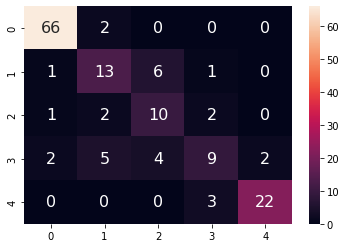

In [ ]:
sns.heatmap(KNN_selangor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

Johor Original

In [ ]:
#Johor Ori
KNN_johor = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_johor.fit(X_johor_train_class,y_johor_train_class)
KNN_johor_ypred = KNN_johor.predict(X_johor_test_class)

KNN_johor_conf_max = confusion_matrix(y_johor_test_class,KNN_johor_ypred)
print("Confusion matrix :")
print(KNN_johor_conf_max)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class, KNN_johor_ypred)))
print(classification_report(y_johor_test_class,KNN_johor_ypred))

Confusion matrix :
[[79  3  0  0  0]
 [ 5 34  0  0  0]
 [ 0 11  2  1  0]
 [ 0  1  1  7  1]
 [ 0  0  0  1  5]]
Accuracy = 0.84
              precision    recall  f1-score   support

           1       0.94      0.96      0.95        82
           2       0.69      0.87      0.77        39
           3       0.67      0.14      0.24        14
           4       0.78      0.70      0.74        10
           5       0.83      0.83      0.83         6

    accuracy                           0.84       151
   macro avg       0.78      0.70      0.71       151
weighted avg       0.84      0.84      0.82       151



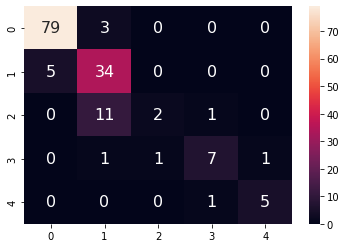

In [ ]:
sns.heatmap(KNN_johor_conf_max,annot=True,annot_kws={"size":16},fmt="d")

Johor SMOTE

In [ ]:
#Johor SMOTE
KNN_johor_smote = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_johor_smote.fit(X_johor_train_class_smote,y_johor_train_class_smote)
KNN_johor_ypred_smote = KNN_johor_smote.predict(X_johor_test_class_smote)

KNN_johor_conf_max_smote = confusion_matrix(y_johor_test_class_smote,KNN_johor_ypred_smote)
print("Confusion matrix :")
print(KNN_johor_conf_max_smote)
print('Accuracy = {:.2f}'. format(accuracy_score(y_johor_test_class_smote, KNN_johor_ypred_smote)))
print(classification_report(y_johor_test_class_smote,KNN_johor_ypred_smote))

Confusion matrix :
[[76  6  0  0  0]
 [ 5 20 14  0  0]
 [ 0  8  4  2  0]
 [ 0  1  1  7  1]
 [ 1  1  0  1  3]]
Accuracy = 0.73
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        82
           2       0.56      0.51      0.53        39
           3       0.21      0.29      0.24        14
           4       0.70      0.70      0.70        10
           5       0.75      0.50      0.60         6

    accuracy                           0.73       151
   macro avg       0.63      0.59      0.60       151
weighted avg       0.74      0.73      0.73       151



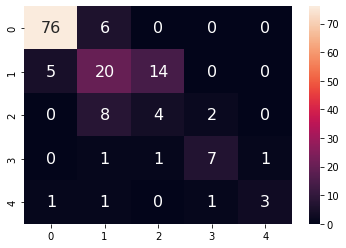

In [ ]:
sns.heatmap(KNN_johor_conf_max_smote,annot=True,annot_kws={"size":16},fmt="d")

#END OF CODE

Done by Chang Kai Boon and Soe Zhao Hong

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1
